## Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:

#### For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

## Dataset Link-
	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, median_absolute_error, max_error,accuracy_score, mean_absolute_percentage_error


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
df.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   
5         29.219342         23.822613  6.182295   50.231389  ...         0.0   
6         28.551859         24.238467  5.587135  125.110007  ...         0.0   
7         28.851982         23.819054  6.104417   42.011547  ...         0.0   
8         28.426975         23.332373  6.017135   85.110971  ...         0.0   
9         27.576705         22.527018  6.518841   63.006075  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   
5         0.0         0.0  37.5102  127.042   54.6384  0.1457   
6         0.0         0.0  37.5776  126.838   12.3700  0.0985   
7         0.0         0.0  37.4697  126.910   52.5180  1.5629   
8         0.0         0.0  37.4967  126.826   50.9312  0.4125   
9         0.0         0.0  37.4562  126.955  208.5070  5.1782   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  
5      5873.780762       31.5       24.0  
6      5849.233398       30.9       23.4  
7      5863.992188       31.1       22.9  
8      5876.901367       31.3       21.6  
9      5893.608398       30.5       21.0  

[10 rows x 25 columns]

In [5]:
df.tail(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7742  ...    0.000000    0.000000    0.000000  37.4832  127.024   56.4448   
7743  ...    0.000000    0.000000    0.000000  37.5776  126.938   75.0924   
7744  ...    0.000000    0.000000    0.000000  37.6181  127.004  146.5540   
7745  ...    0.000000    0.000000    0.000000  37.5507  127.040   26.2980   
7746  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7742  1.231300      4435.611816       27.8       16.7  
7743  1.767800      4495.473633       27.1       16.6  
7744  4.729600      4554.965332       26.7       16.3  
7745  0.572100      4456.024414       27.6       17.7  
7746  0.133200      4441.803711       28.0       17.1  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[10 rows x 25 columns]

In [6]:
df.sample(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1275      1.0  20-08-2013          29.3          21.7    47.241787   
1133      9.0  14-08-2013          33.3          24.8    62.512062   
1254      5.0  19-08-2013          33.2          25.4    41.914200   
3033      9.0  28-08-2014          30.6          21.7    50.266586   
6707      8.0  20-07-2017          33.6          26.1    63.700958   
3465     16.0  14-07-2015          29.5          21.4    34.633308   
136      12.0  05-07-2013          29.3          20.8    50.021481   
5017     18.0  14-07-2016          33.3          24.6    55.993679   
5437     13.0  31-07-2016          33.4          26.7          NaN   
5982      8.0  22-08-2016          34.7          27.6    43.351170   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
1275    80.449524         31.918409         23.790759  7.610144   81.891122   
1133    89.312218         31.117976         26.251535  6.754873   91.896560   
1254    85.863731         32.107529         23.399284  4.689877  140.614518   
3033    94.465256         28.068473         20.357952  5.375702   87.481637   
6707    88.013657         31.109160         26.477772  7.796702   61.766307   
3465    86.577919         33.818390         23.207682  7.158210  118.902544   
136     92.278481         31.288387         21.902833  7.296643   23.634114   
5017    77.708580         27.483596         23.298142  5.809156   65.183776   
5437          NaN               NaN               NaN       NaN         NaN   
5982    74.261459         33.422444         25.102987  7.015578   73.924057   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
1275  ...    0.000000         0.0    0.000000  37.6046  126.991  212.3350   
1133  ...    0.383589         0.0    0.000000  37.4967  126.826   50.9312   
1254  ...    0.000000         0.0    0.000000  37.5507  127.135   35.0380   
3033  ...    0.000000         0.0    1.468887  37.4967  126.826   50.9312   
6707  ...    0.000000         0.0    0.000000  37.4697  126.910   52.5180   
3465  ...    0.000000         0.0    0.000000  37.4697  126.995   82.2912   
136   ...    0.000000         0.0    0.000000  37.5507  126.988  132.1180   
5017  ...    0.000000         0.0    0.006910  37.4832  127.024   56.4448   
5437  ...         NaN         NaN         NaN  37.5776  127.083   59.8324   
5982  ...    0.000000         0.0    0.000000  37.4697  126.910   52.5180   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
1275  2.7850      4985.761230       30.8       22.1  
1133  0.4125      5047.208984       32.7       24.9  
1254  0.5055      4857.075195       32.2       21.5  
3033  0.4125      4549.967285       29.9       20.5  
6707  1.5629      5640.737305       32.5       27.1  
3465  2.2579      5726.639648       33.0       20.2  
136   0.5931      5891.303711       31.3       20.5  
5017  1.2313      5719.582520       31.1       23.9  
5437  2.6865      5386.636230       32.9       25.4  
5982  1.5629      4708.868164       32.6       27.1  

[10 rows x 25 columns]

## Exploratory Data Analysis

In [7]:
df.shape

(7752, 25)

Dataset has 7752 rows and 15 columns



In [8]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [9]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All columns are in float 64 datatype except Date column

## Checking for null Values in dataset

In [10]:
print("Total Missing values in dataset:- ", df.isnull().sum().sum())
print('\n')
print(df.isnull().sum())

Total Missing values in dataset:-  1248


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


There are some null values in most of the columns so we treat them

In [11]:
columns = [
    'station','Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
    'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
    'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
    'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
    'Next_Tmax', 'Next_Tmin'
]

df[columns] = df[columns].fillna(df[columns].median())

In [12]:
df['Date'][0].split('-')

['30', '06', '2013']

In [13]:
list_of_year = []
list_of_month = []
list_of_day = []

# sort day, month and year in different list for vizualization and processing purposes

for i in df['Date']:
    try :
        split_obj = i.split('-')
        list_of_year.append(split_obj[2])
        list_of_month.append(split_obj[1])    
        list_of_day.append(split_obj[0]) 
    except AttributeError:
        list_of_year.append(np.nan)
        list_of_month.append(np.nan)
        list_of_day.append(np.nan)

In [14]:
df['year'] = list_of_year
df['month'] = list_of_month
df['day'] = list_of_day

In [15]:
df['year'] = pd.to_numeric(df['year']) 
df['month'] = pd.to_numeric(df['month']) 
df['day'] = pd.to_numeric(df['day'])

In [16]:
df.drop('Date', axis=1, inplace=True)

In [17]:
columns = ['year','month', 'day']

df[columns] = df[columns].fillna(df[columns].median())

In [18]:
print(df.isnull().sum())

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                0
month               0
day                 0
dtype: int64


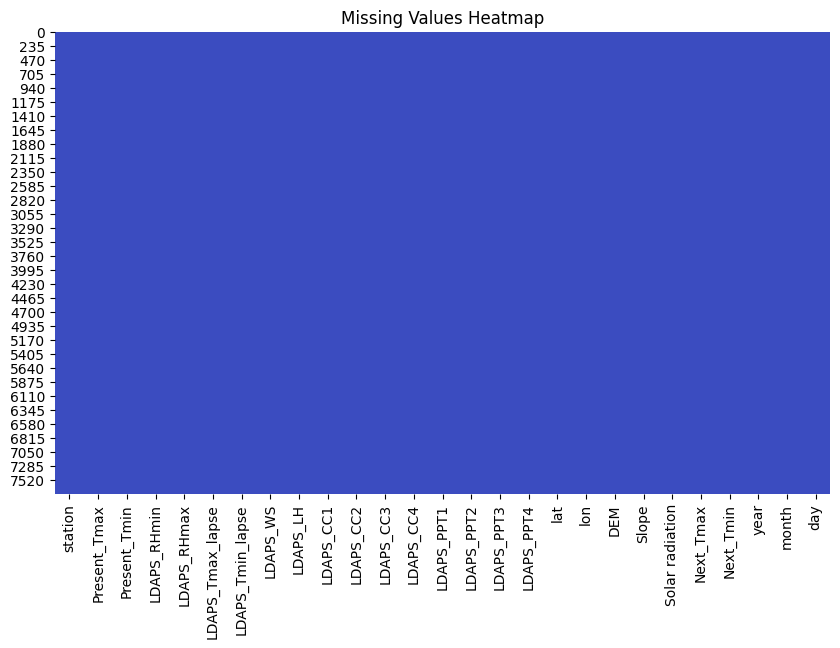

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Fill all missing values with mean values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


In [22]:
#checking duplicate values
duplicate_rows = df[df.duplicated(keep=False)]

print(duplicate_rows)

Empty DataFrame
Columns: [station, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin, year, month, day]
Index: []

[0 rows x 27 columns]


There are no any duplicate rows

In [24]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000e+00      0.112582      0.131525    -0.066729   
Present_Tmax      1.125819e-01      1.000000      0.618769    -0.205341   
Present_Tmin      1.315245e-01      0.618769      1.000000     0.121800   
LDAPS_RHmin      -6.672872e-02     -0.205341      0.121800     1.000000   
LDAPS_RHmax      -1.669531e-01     -0.300261     -0.012659     0.578770   
LDAPS_Tmax_lapse  6.910687e-02      0.570287      0.464420    -0.564575   
LDAPS_Tmin_lapse  1.047525e-01      0.624229      0.764239     0.089346   
LDAPS_WS          5.275379e-03     -0.123565     -0.037682     0.294537   
LDAPS_LH         -1.333385e-01      0.134216     -0.011331    -0.070654   
LDAPS_CC1         6.917419e-03     -0.313176      0.082000     0.613885   
LDAPS_CC2         3.395569e-03     -0.214904      0.088309     0.745482   
LDAPS_CC3         6.938517e-04     -0.145477     -0.005304     0.689720   
LDAPS_CC4         6.123659e-03     -0.142549     -0.047496     0.514163   
LDAPS_PPT1       -2.708269e-03     -0.111148      0.109085     0.262875   
LDAPS_PPT2       -8.246528e-03     -0.101362      0.064851     0.391110   
LDAPS_PPT3       -1.245767e-02     -0.122051     -0.049017     0.240831   
LDAPS_PPT4       -1.039876e-02     -0.101118     -0.065550     0.168797   
lat              -2.375015e-01     -0.052659     -0.078547     0.087093   
lon              -1.187044e-01      0.008990     -0.043509    -0.076232   
DEM              -2.558297e-01     -0.187138     -0.250299     0.102108   
Slope            -9.006090e-02     -0.105884     -0.146460     0.123736   
Solar radiation  -1.900100e-02     -0.025401      0.053638     0.244643   
Next_Tmax         1.079004e-01      0.610256      0.471723    -0.439171   
Next_Tmin         1.282162e-01      0.622700      0.796657     0.094061   
year              1.435563e-15      0.059991      0.037707    -0.002044   
month            -1.488007e-16      0.145949      0.087451    -0.189439   
day               8.896462e-18     -0.141845     -0.106090    -0.063688   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166953          0.069107          0.104753  0.005275   
Present_Tmax        -0.300261          0.570287          0.624229 -0.123565   
Present_Tmin        -0.012659          0.464420          0.764239 -0.037682   
LDAPS_RHmin          0.578770         -0.564575          0.089346  0.294537   
LDAPS_RHmax          1.000000         -0.373274         -0.113914  0.134786   
LDAPS_Tmax_lapse    -0.373274          1.000000          0.654013 -0.311973   
LDAPS_Tmin_lapse    -0.113914          0.654013          1.000000 -0.130245   
LDAPS_WS             0.134786         -0.311973         -0.130245  1.000000   
LDAPS_LH             0.238183          0.047954         -0.134906  0.007115   
LDAPS_CC1            0.436097         -0.438410          0.010691  0.289792   
LDAPS_CC2            0.390879         -0.523594          0.047545  0.261386   
LDAPS_CC3            0.226434         -0.541260         -0.044233  0.243402   
LDAPS_CC4            0.130008         -0.429456         -0.080587  0.221066   
LDAPS_PPT1           0.267698         -0.111105          0.037727  0.153213   
LDAPS_PPT2           0.228398         -0.242113          0.000588  0.192427   
LDAPS_PPT3           0.134087         -0.188133         -0.088791  0.162173   
LDAPS_PPT4           0.117376         -0.160300         -0.094855  0.144550   
lat                  0.195761         -0.042093         -0.096252  0.036646   
lon                  0.025662          0.090665         -0.026700 -0.059448   
DEM                  0.177134         -0.178895         -0.195445  0.190995   
Slope                0.219557         -0.162332         -0.185839  0.171577   
Solar radiation      0.148259          0.047820          0.159445  0.122966   
Next_Tmax           -0.281282          0.827473          0.588224 -0.345578   
Next_Tmin           -0.070

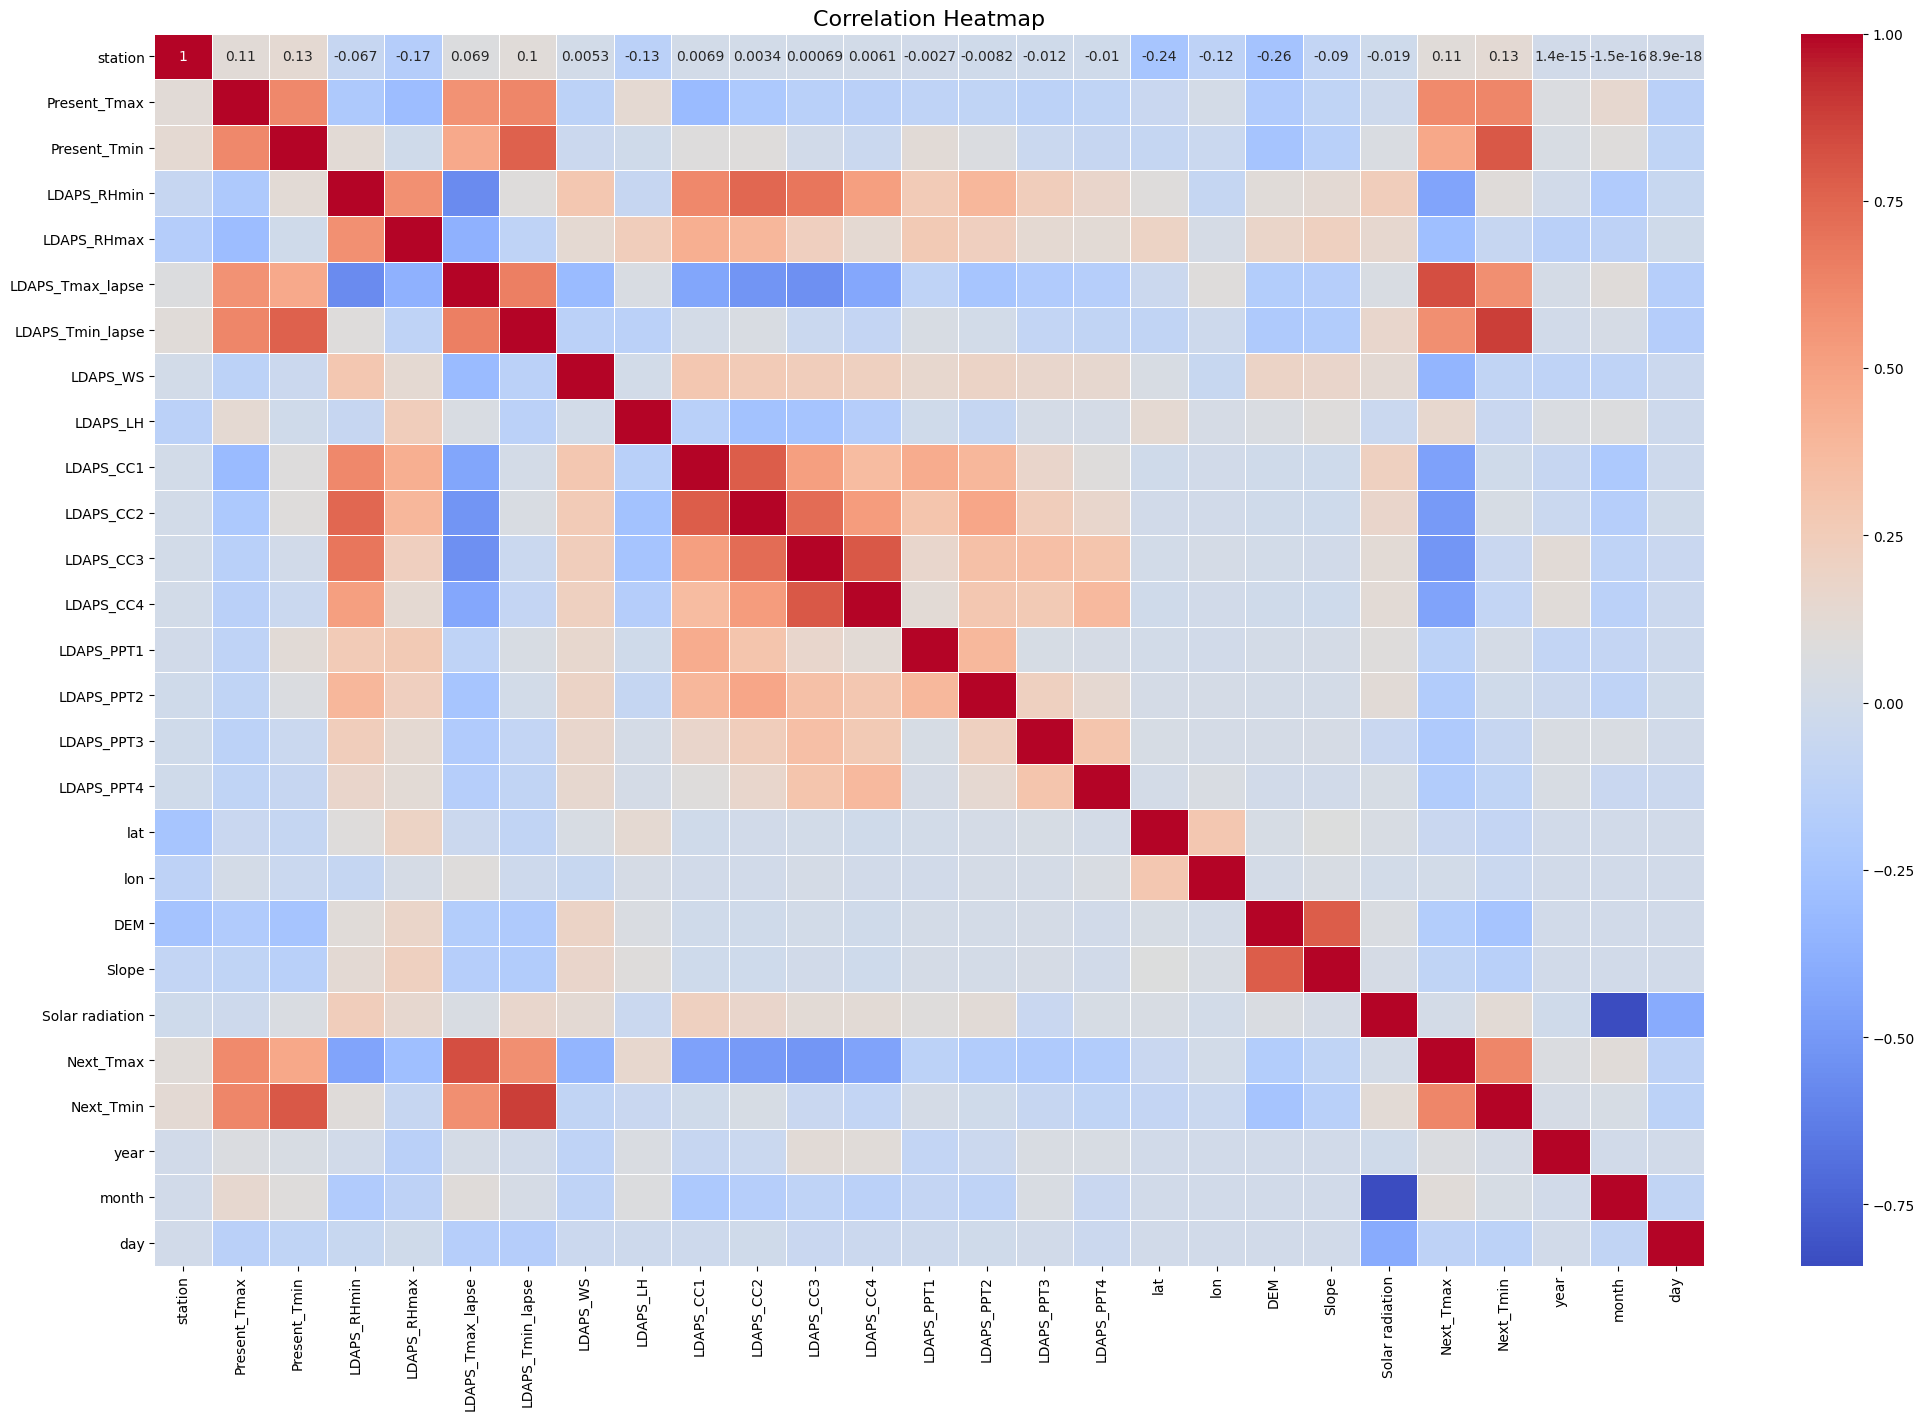

In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(25, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### checking outliers

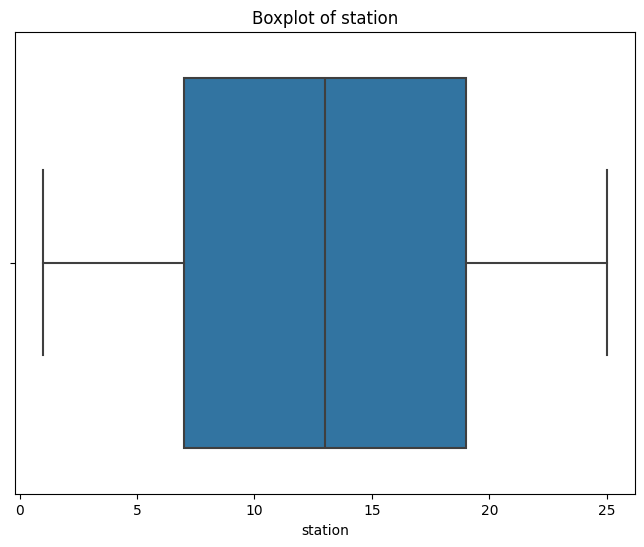

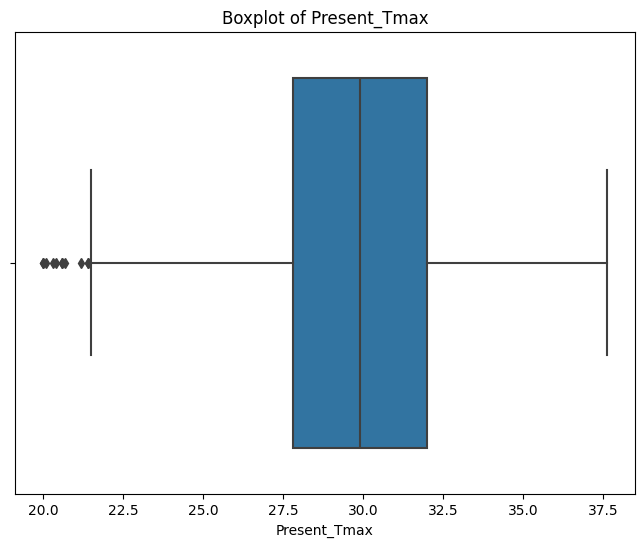

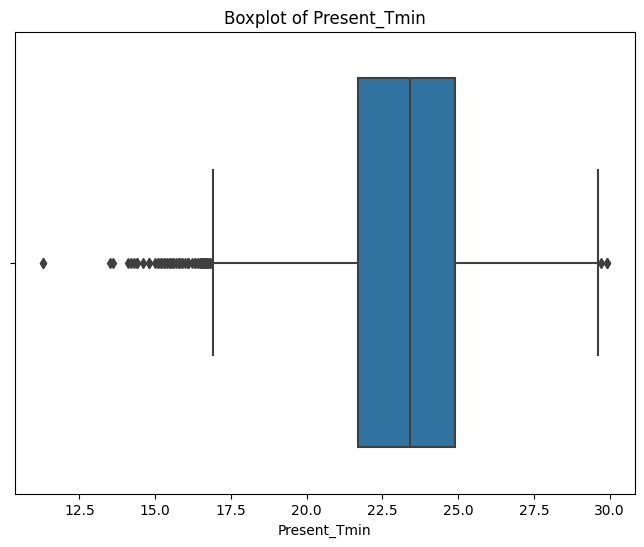

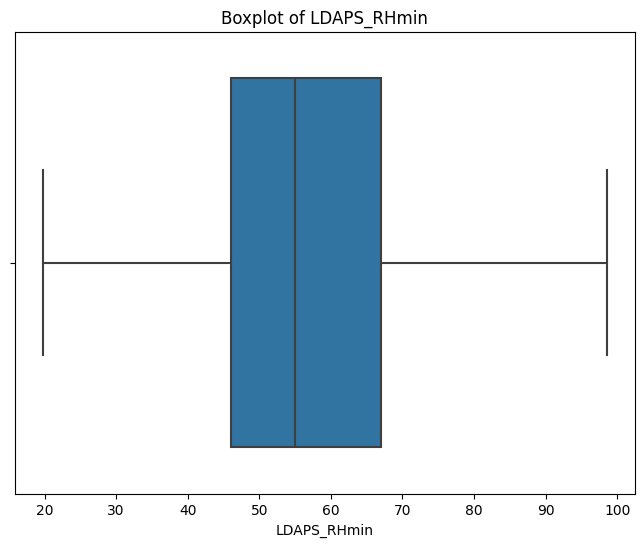

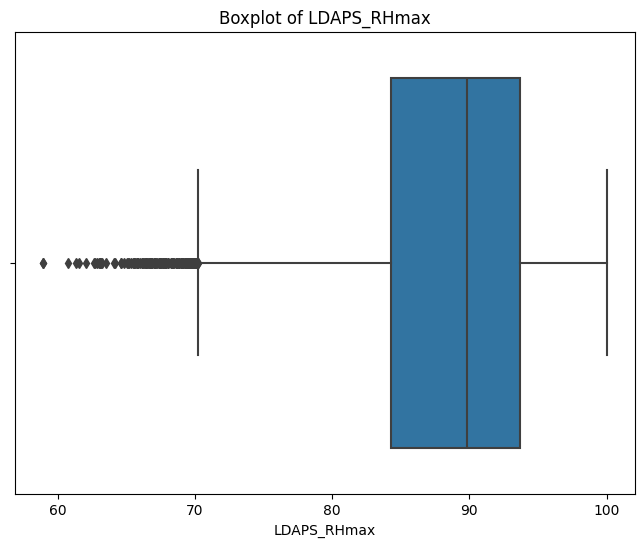

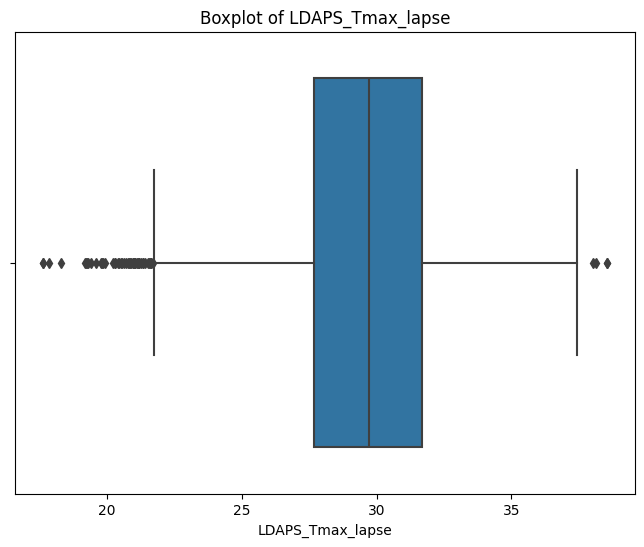

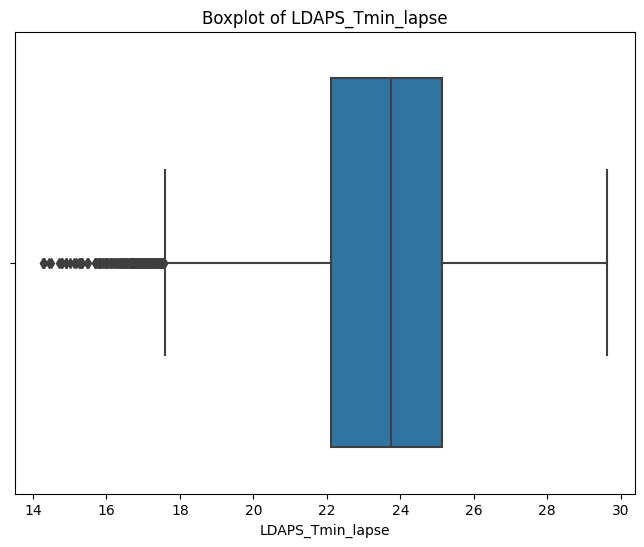

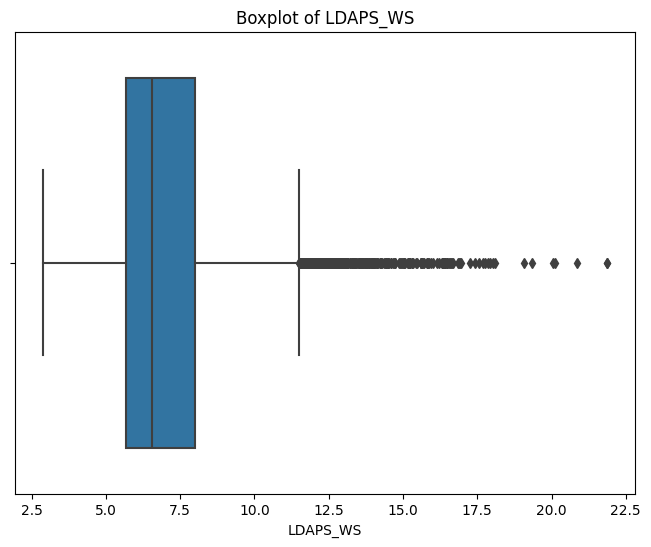

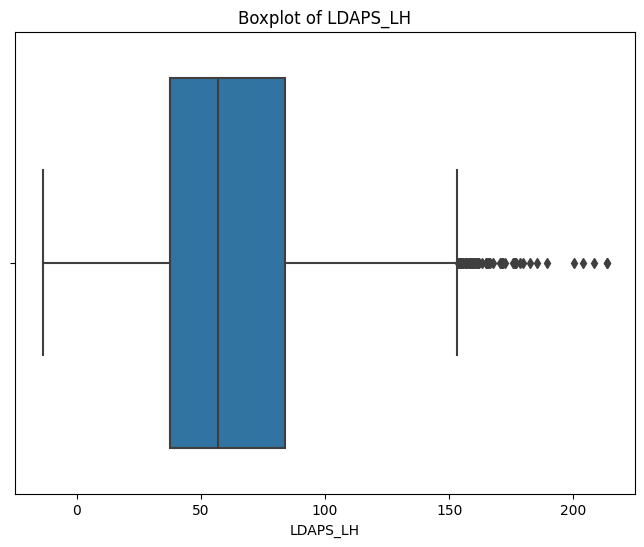

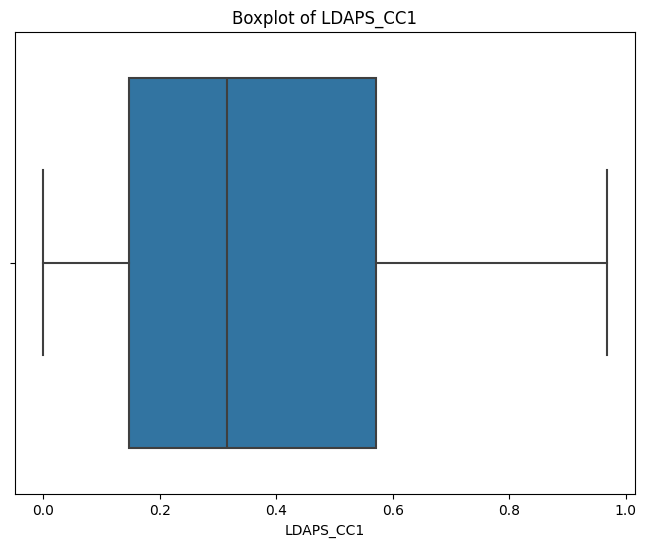

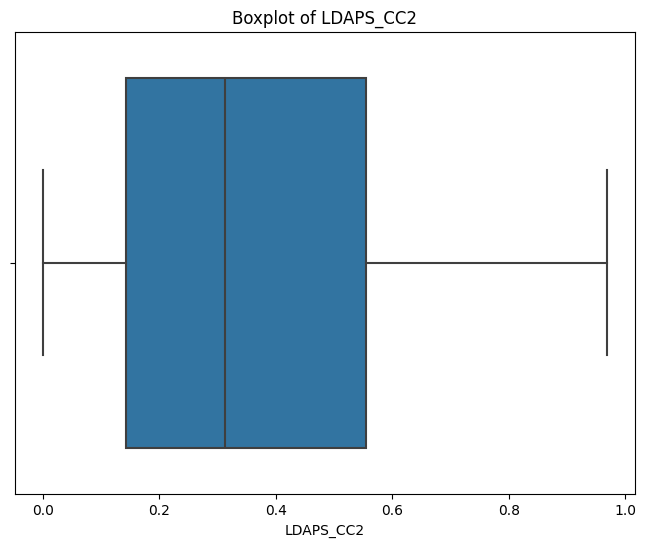

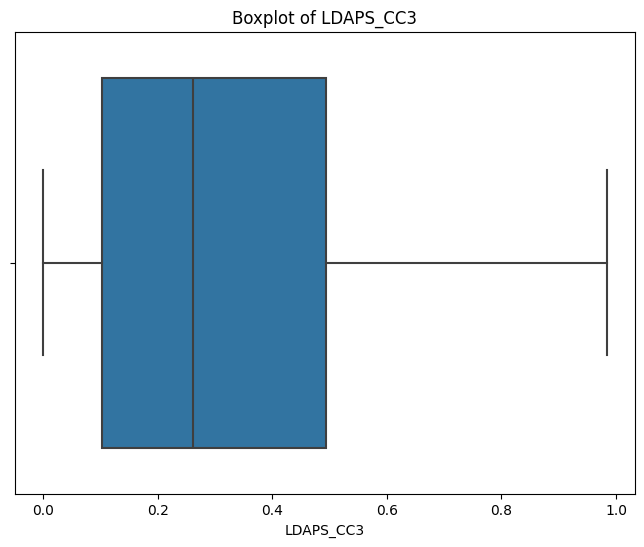

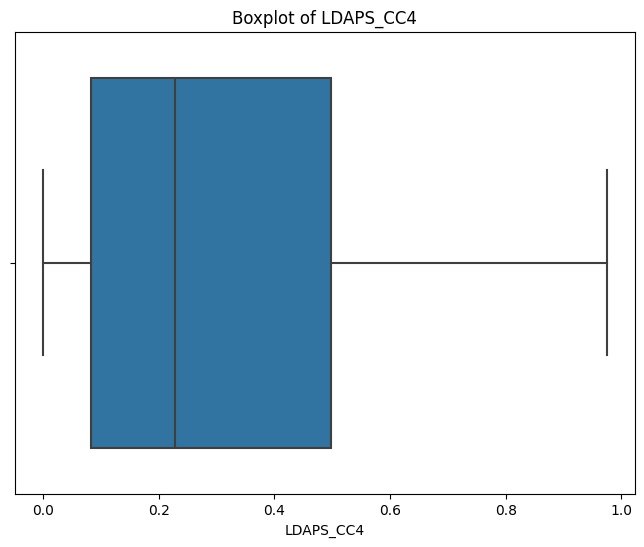

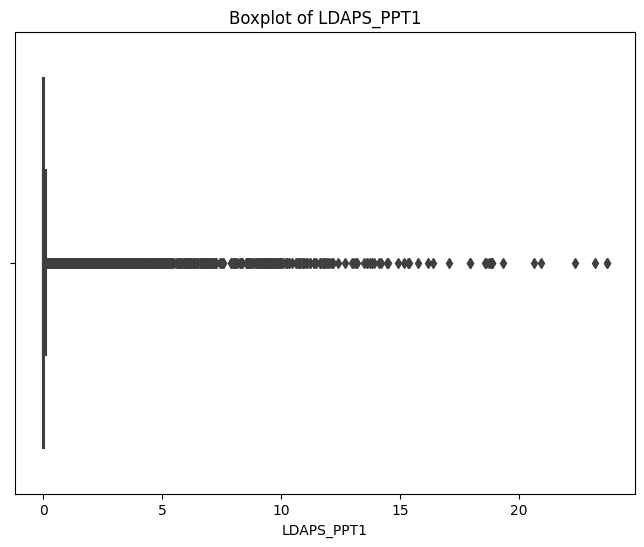

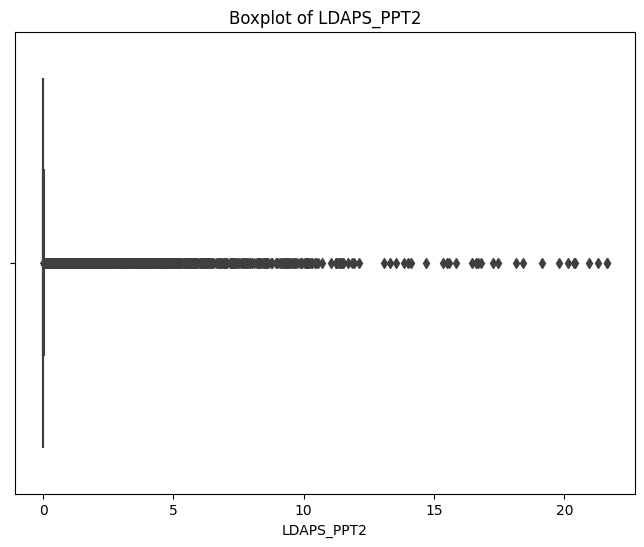

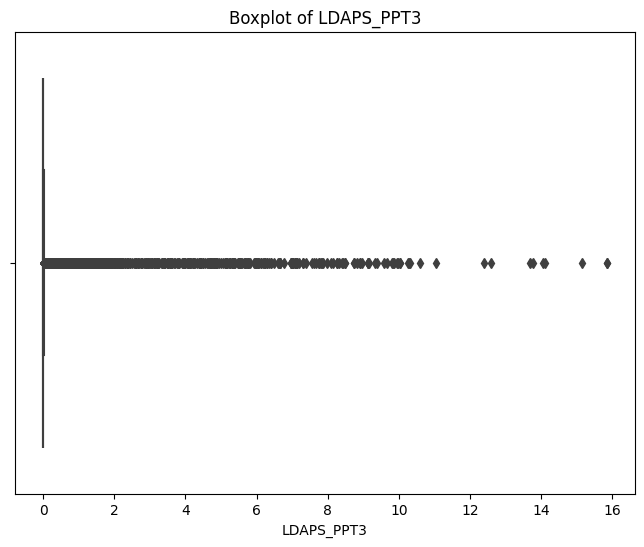

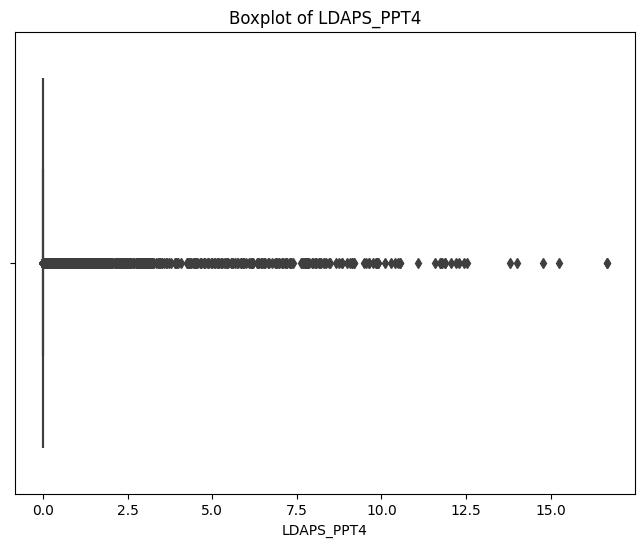

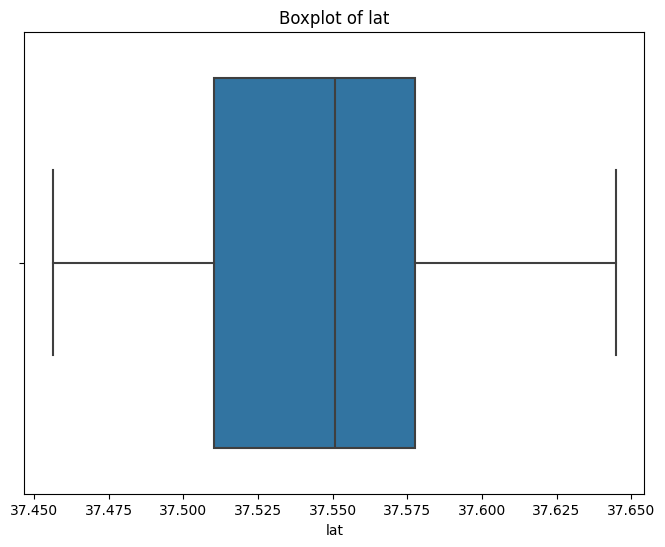

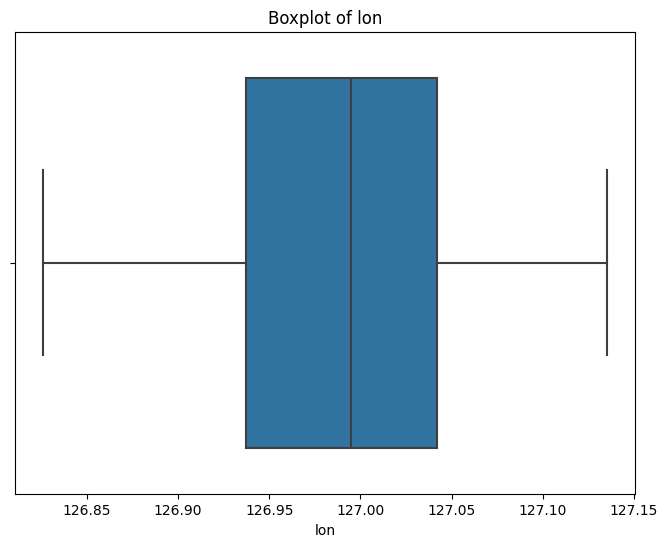

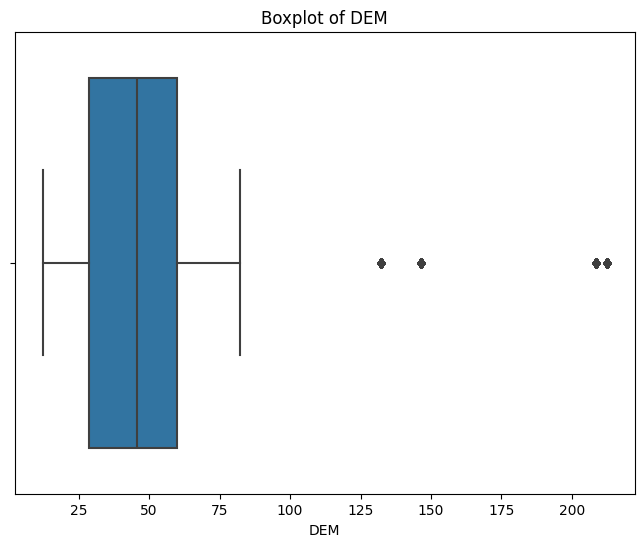

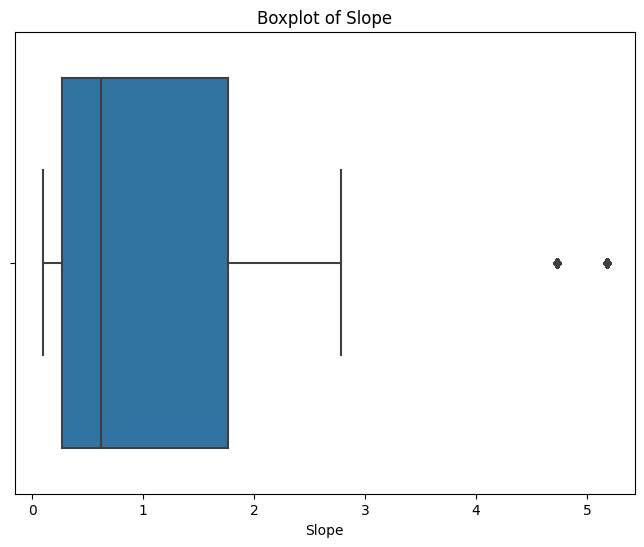

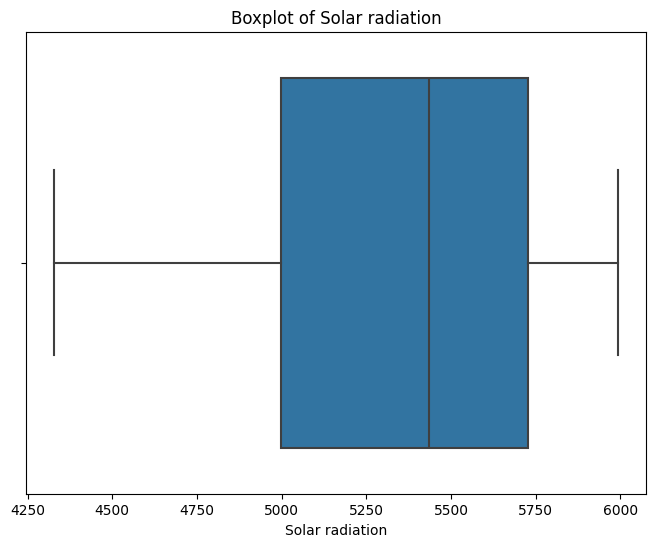

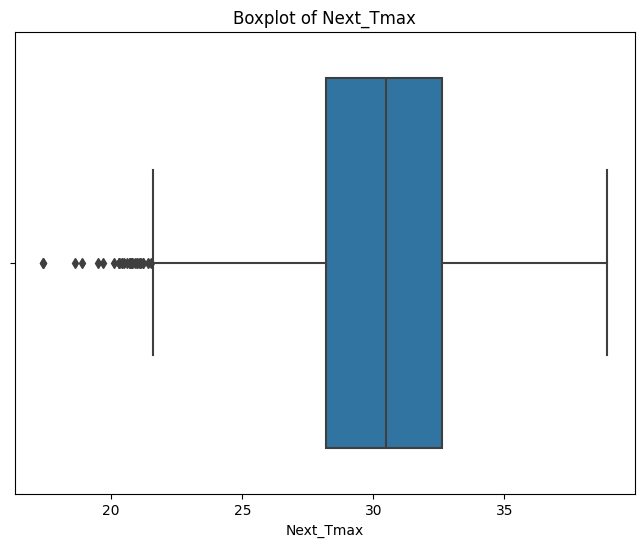

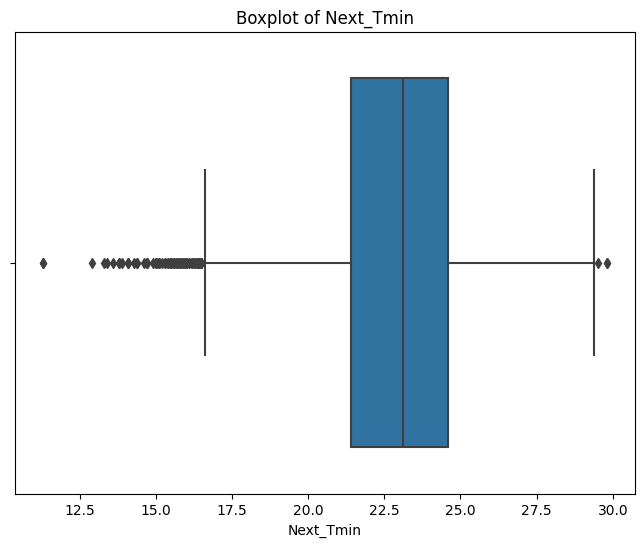

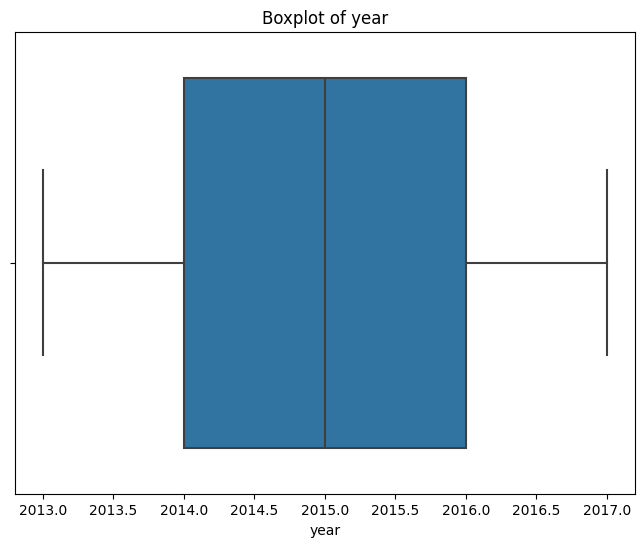

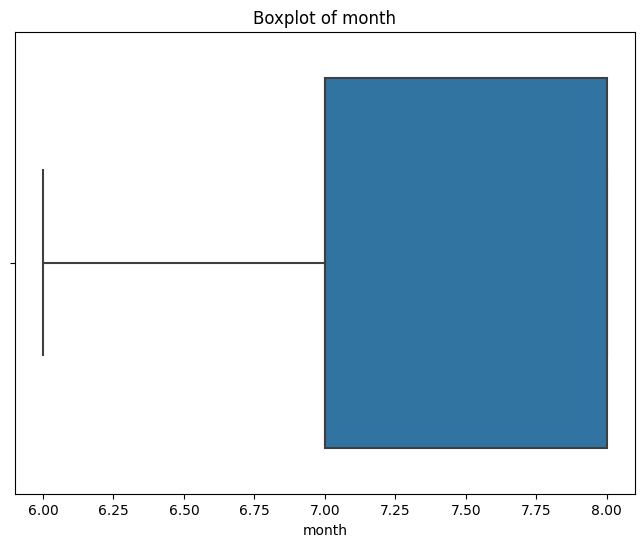

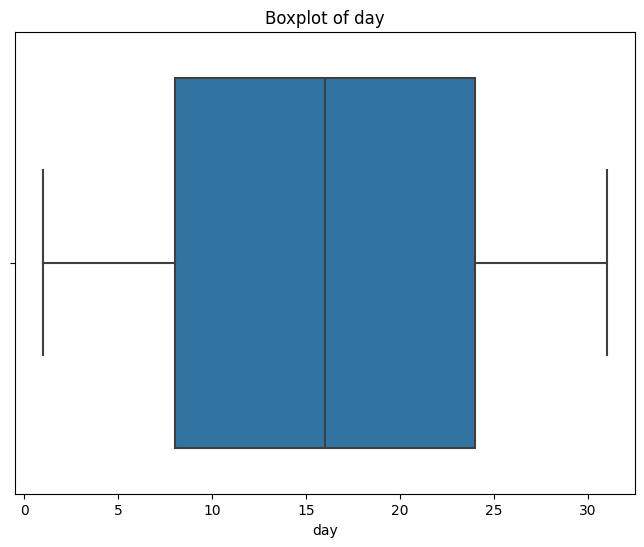

In [26]:
for column in df:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

We have some outliers is aur dataset so we treat them

In [27]:
from scipy.stats import zscore

# Features containing outliers
features = df[['LDAPS_RHmax', 
               'LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS',
               'LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3',
               'LDAPS_PPT4','DEM','Next_Tmax','Next_Tmin']]

z = np.abs(zscore(features))

# Creating a new dataframe
df1 = df[(z < 3).all(axis=1)]

In [28]:
data_loss = (len(df) - len(df1)) / len(df) * 100
print(f"Data loss after treating outliers: {data_loss:.2f}%")

Data loss after treating outliers: 10.81%


In [29]:
df=df1

In [30]:
#Checking unique vales of the columns
df.nunique().to_frame("No. of Unique values")

No. of Unique values
station                             25
Present_Tmax                       161
Present_Tmin                       147
LDAPS_RHmin                       6836
LDAPS_RHmax                       6830
LDAPS_Tmax_lapse                  6839
LDAPS_Tmin_lapse                  6839
LDAPS_WS                          6839
LDAPS_LH                          6839
LDAPS_CC1                         6747
LDAPS_CC2                         6762
LDAPS_CC3                         6771
LDAPS_CC4                         6730
LDAPS_PPT1                        2306
LDAPS_PPT2                        1988
LDAPS_PPT3                        1831
LDAPS_PPT4                        1452
lat                                 12
lon                                 25
DEM                                 25
Slope                               25
Solar radiation                   1550
Next_Tmax                          164
Next_Tmin                          137
year                                 5
month                                3
day                                 31

In [31]:
#checking unique values in station column
df['station'].value_counts()

station
9.0     285
23.0    284
8.0     284
24.0    283
19.0    283
18.0    282
22.0    282
11.0    282
16.0    281
13.0    280
12.0    280
15.0    280
6.0     279
5.0     278
2.0     277
21.0    276
25.0    275
14.0    275
7.0     273
4.0     272
10.0    271
3.0     270
1.0     266
17.0    260
20.0    256
Name: count, dtype: int64

In [32]:
df['lat'].value_counts()

lat
37.5507    1114
37.5776    1106
37.5372     566
37.4697     565
37.5102     561
37.4967     560
37.5237     558
37.6046     543
37.6181     516
37.4832     282
37.6450     272
37.4562     271
Name: count, dtype: int64

In [33]:
df['lon'].value_counts()

lon
126.826    285
126.891    284
126.910    284
126.909    283
126.938    283
127.024    282
127.086    282
127.085    282
126.995    281
127.083    280
126.988    280
126.937    280
127.042    279
127.135    278
127.032    277
127.040    276
126.970    275
126.927    275
126.838    273
127.022    272
126.955    271
127.058    270
126.991    266
127.099    260
127.004    256
Name: count, dtype: int64

In [35]:
df['DEM'].value_counts()

DEM
50.9312     285
15.5876     284
52.5180     284
17.2956     283
75.0924     283
56.4448     282
21.9668     282
28.7000     282
82.2912     281
59.8324     280
132.1180    280
30.0464     280
54.6384     279
35.0380     278
44.7624     277
26.2980     276
19.5844     275
30.9680     275
12.3700     273
45.7160     272
208.5070    271
33.3068     270
212.3350    266
53.4712     260
146.5540    256
Name: count, dtype: int64

In [36]:
df['Slope'].value_counts()

Slope
0.4125    285
0.1554    284
1.5629    284
0.2223    283
1.7678    283
1.2313    282
0.1332    282
0.6233    282
2.2579    281
2.6865    280
0.5931    280
0.8552    280
0.1457    279
0.5055    278
0.5141    277
0.5721    276
0.2713    275
0.6180    275
0.0985    273
2.5348    272
5.1782    271
0.2661    270
2.7850    266
0.6970    260
4.7296    256
Name: count, dtype: int64

We have outliers in some columns so we treat them

## Data Visualization

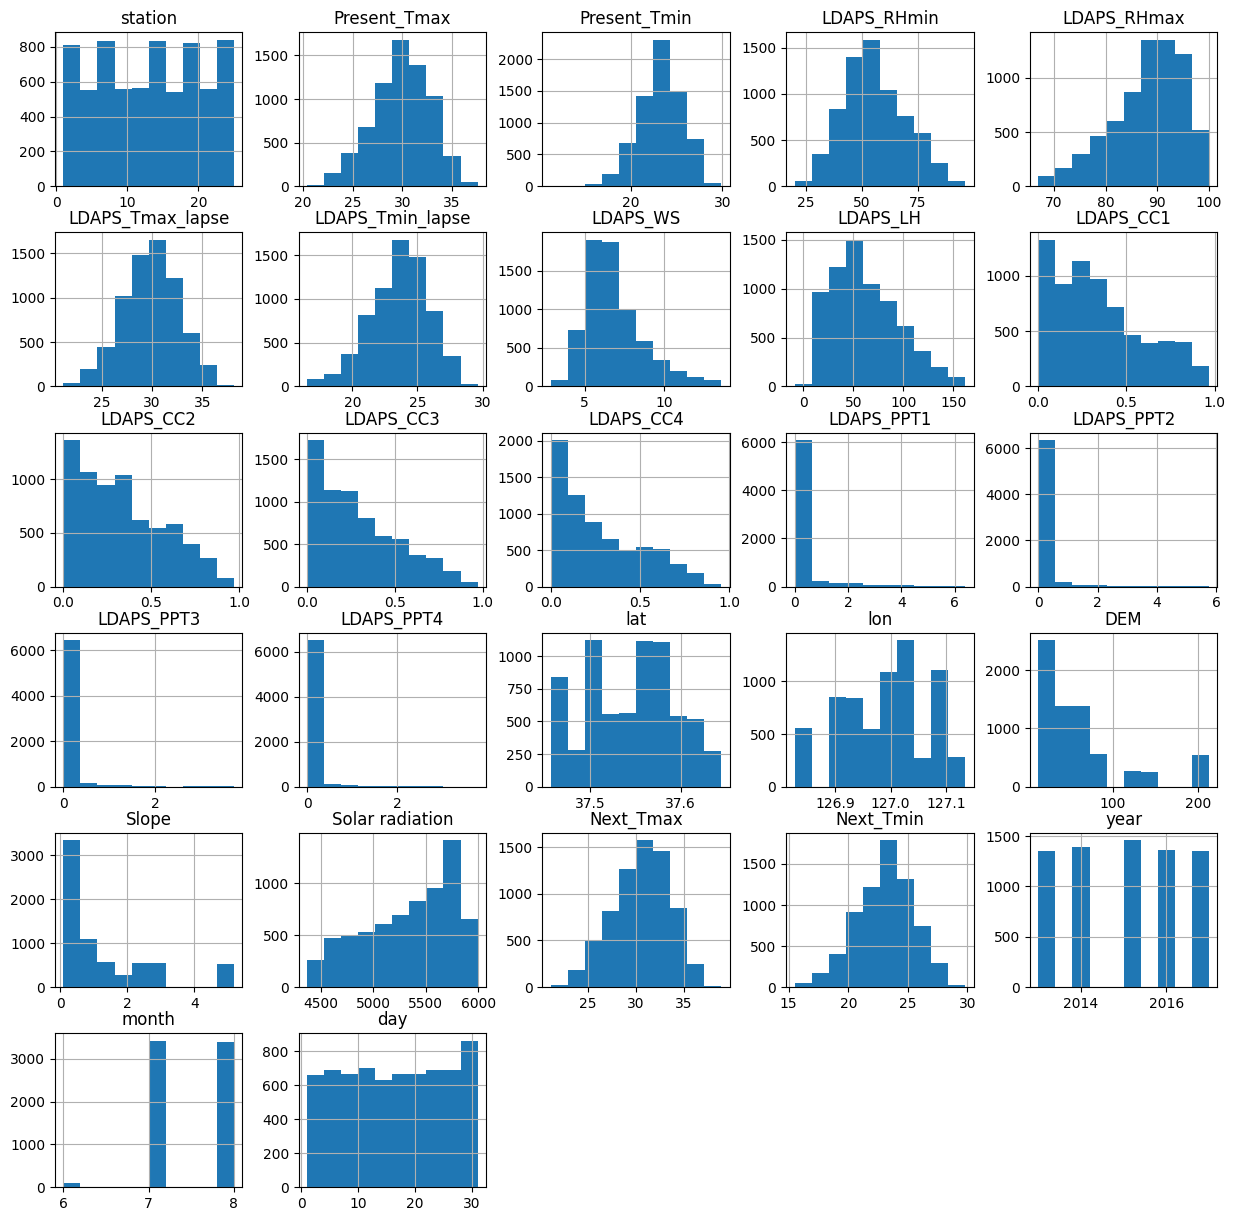

In [37]:
df.hist(figsize=(15,15))
plt.show()

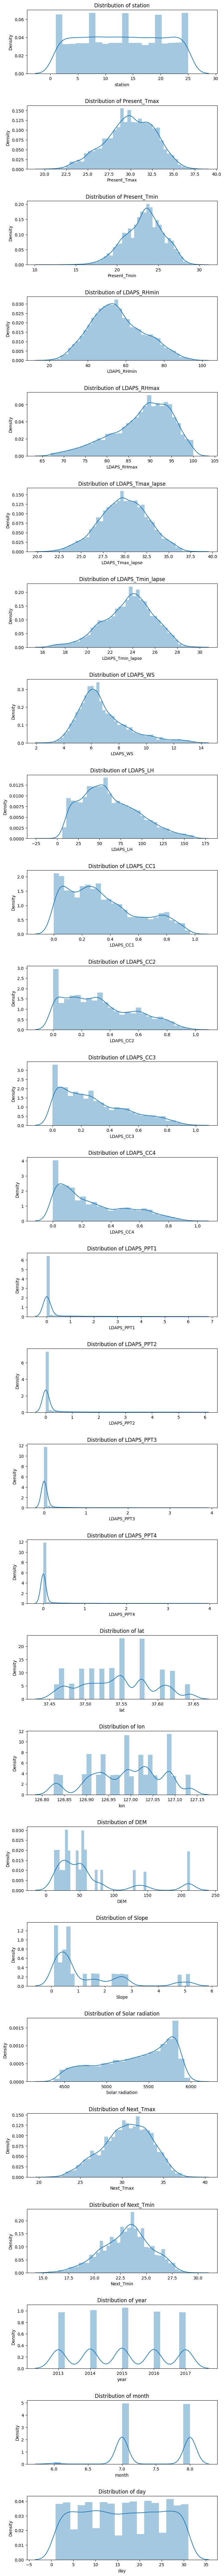

In [38]:
numeric_columns = df.select_dtypes(include=[float]).columns

num_plots = len(numeric_columns)

fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

plt.show()

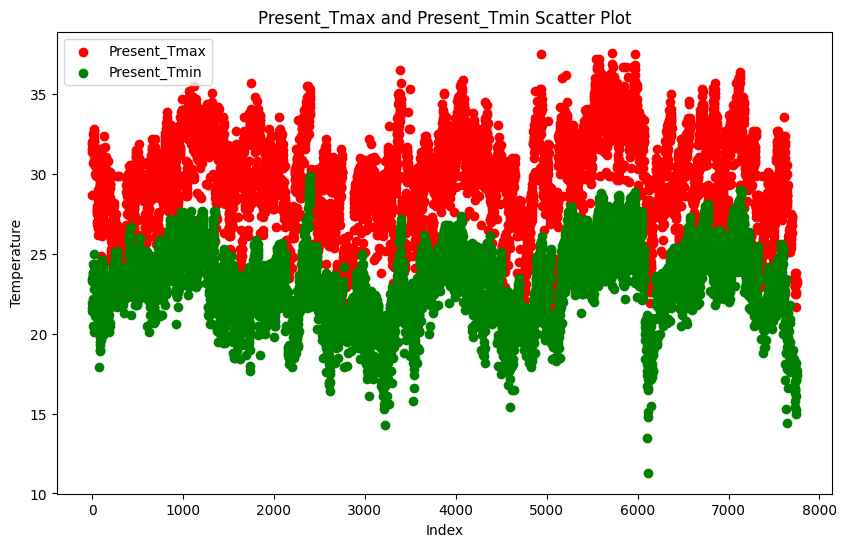

In [39]:
plt.figure(figsize=(10, 6))

plt.scatter(df.index, df['Present_Tmax'], color='red', label='Present_Tmax')
plt.scatter(df.index, df['Present_Tmin'], color='green', label='Present_Tmin')

plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Present_Tmax and Present_Tmin Scatter Plot')
plt.legend()
plt.show()

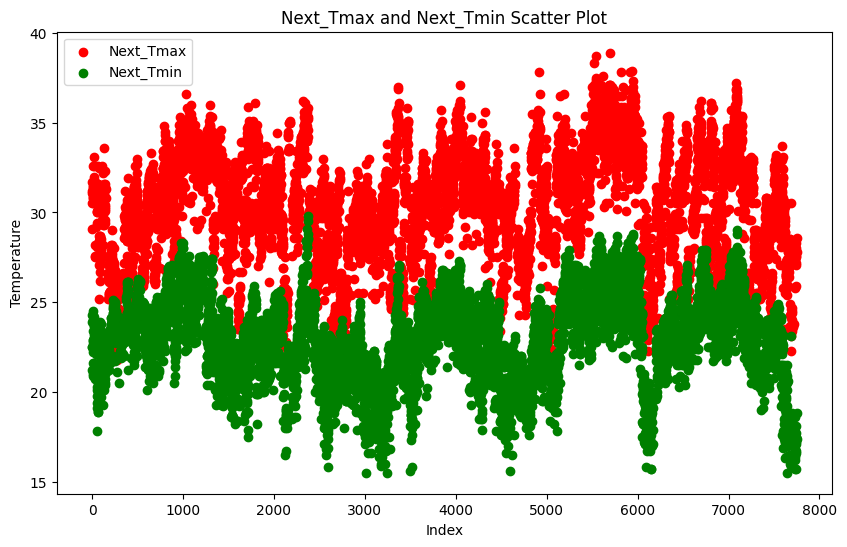

In [40]:
plt.figure(figsize=(10, 6))

plt.scatter(df.index, df['Next_Tmax'], color='red', label='Next_Tmax')
plt.scatter(df.index, df['Next_Tmin'], color='green', label='Next_Tmin')

plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Next_Tmax and Next_Tmin Scatter Plot')
plt.legend()
plt.show()

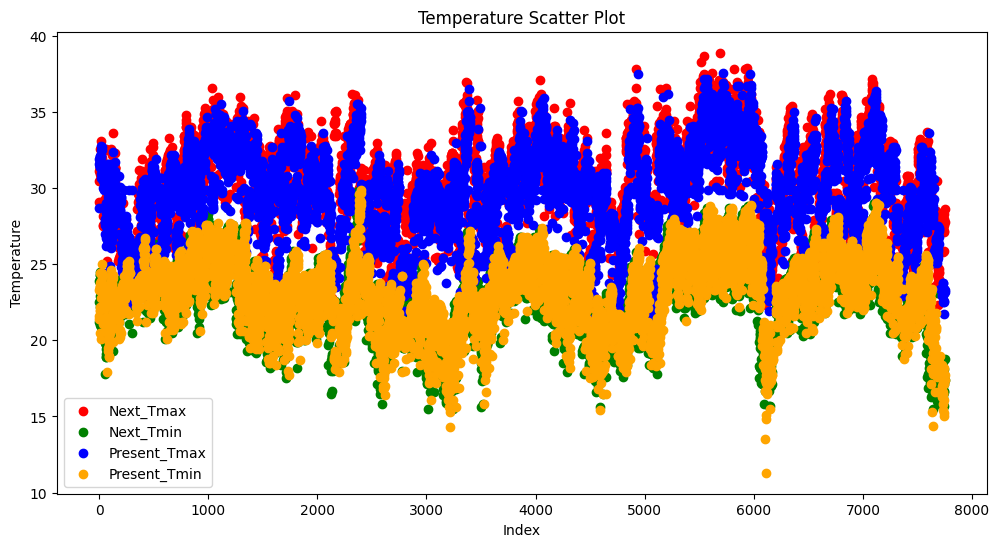

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot for Next_Tmax
plt.scatter(df.index, df['Next_Tmax'], color='red', label='Next_Tmax')

# Scatter plot for Next_Tmin
plt.scatter(df.index, df['Next_Tmin'], color='green', label='Next_Tmin')

# Scatter plot for Present_Tmax
plt.scatter(df.index, df['Present_Tmax'], color='blue', label='Present_Tmax')

# Scatter plot for Present_Tmin
plt.scatter(df.index, df['Present_Tmin'], color='orange', label='Present_Tmin')

plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Scatter Plot')
plt.legend()
plt.show()

Next_tmax and Present_Tmax are almost same

Next_Tmin and Present_Tmin are also same

<Figure size 640x480 with 0 Axes>

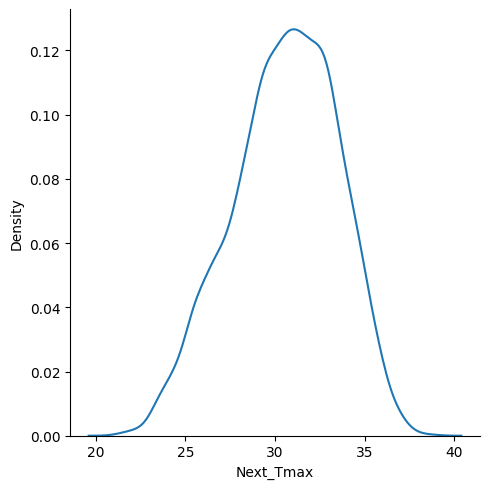

<Figure size 640x480 with 0 Axes>

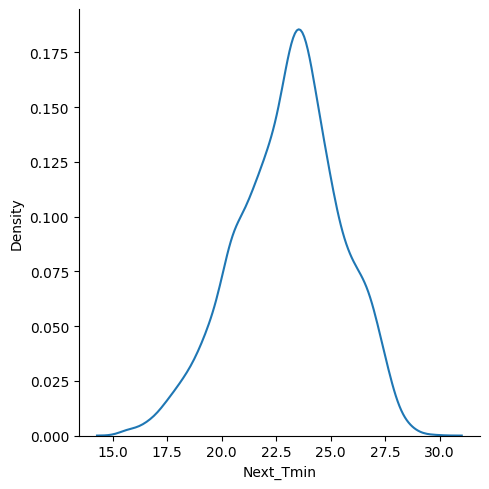

30.551388487127564
2.940892515524302
23.067558576800693
2.373014587731284


In [42]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
print(df["Next_Tmax"].mean())
print(df["Next_Tmax"].std())
print(df["Next_Tmin"].mean())
print(df["Next_Tmin"].std())

In [43]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

     year  month   day  
0  2013.0    6.0  30.0  
1  2013.0    6.0  30.0  
2  2013.0    6.0  30.0  
3  2013.0    6.0  30.0  
4  2013.0    6.0  30.0  

[5 rows x 27 columns]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

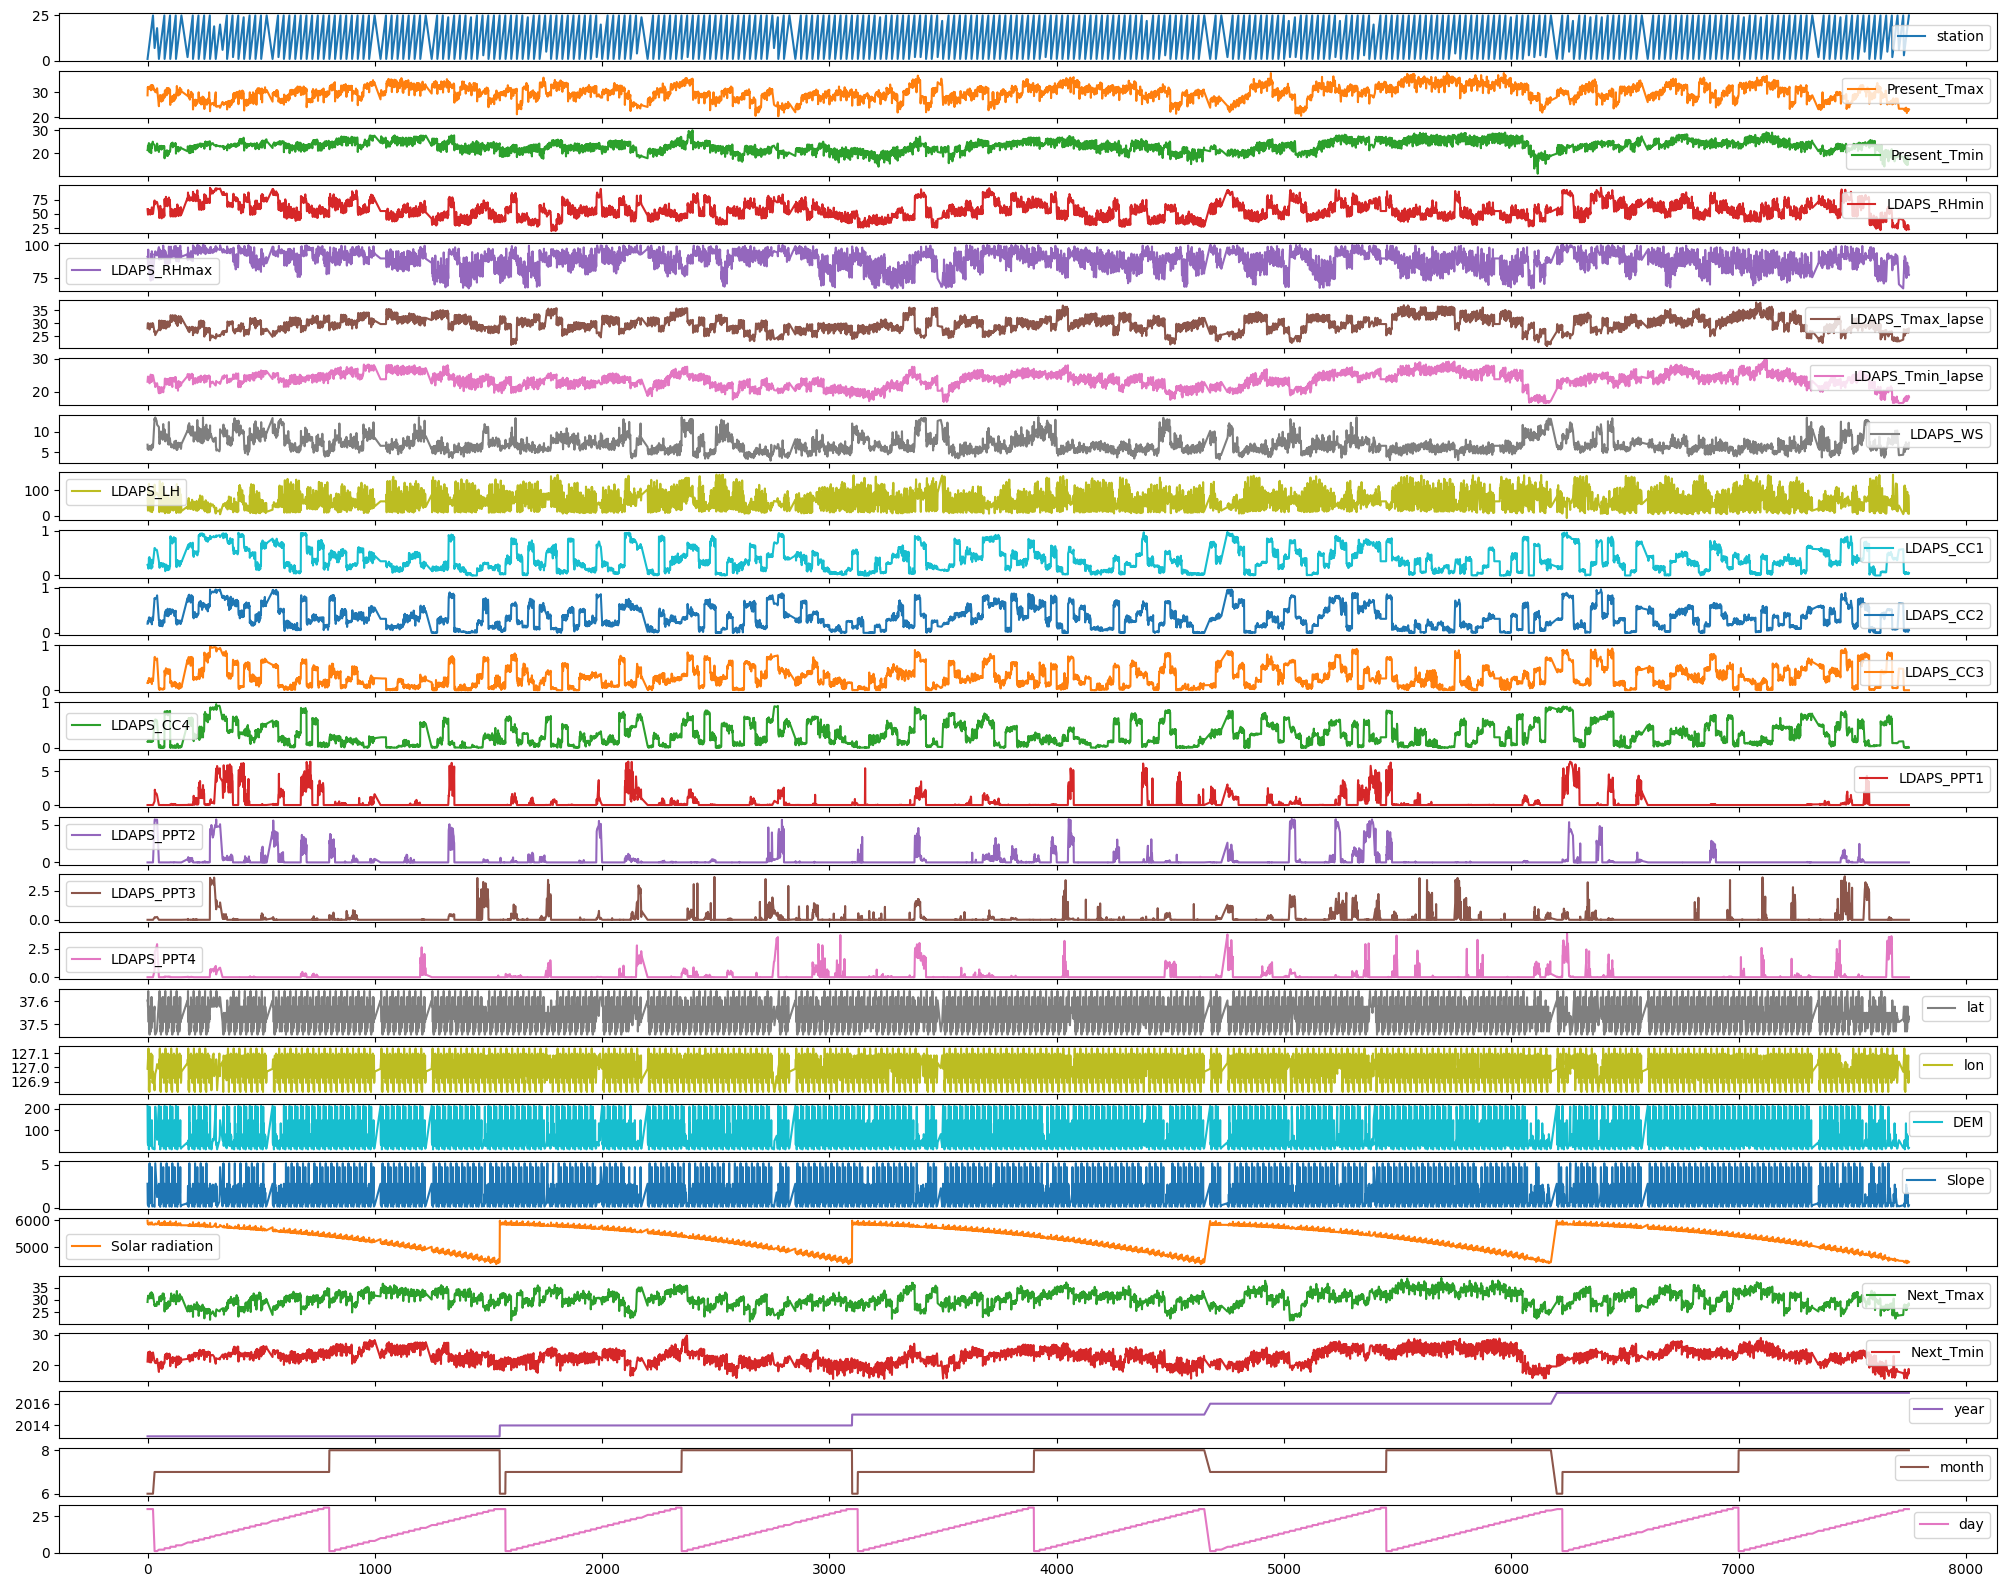

In [44]:
df.plot(subplots=True, figsize=(25,20))

In [45]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year', 'month', 'day'],
      dtype='object')

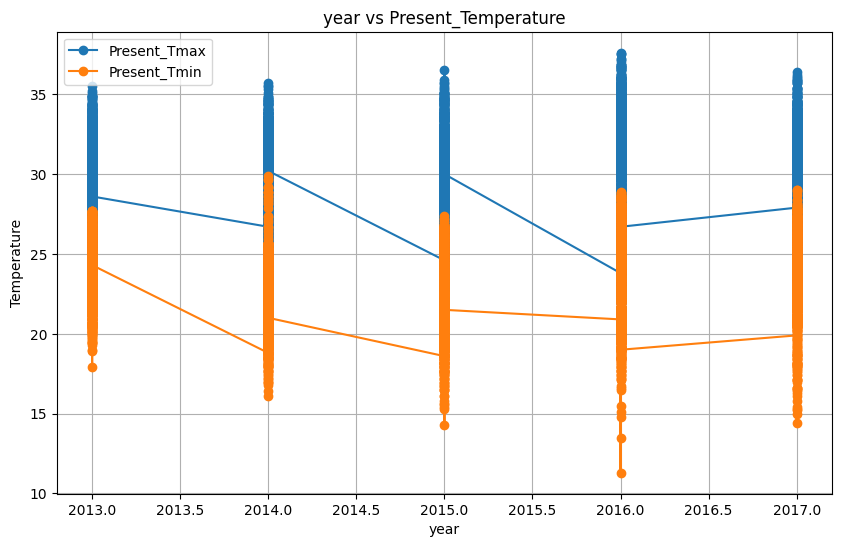

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['Present_Tmax'], marker='o', linestyle='-', label='Present_Tmax')
plt.plot(df['year'], df['Present_Tmin'], marker='o', linestyle='-', label='Present_Tmin')
plt.title('year vs Present_Temperature')
plt.xlabel('year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

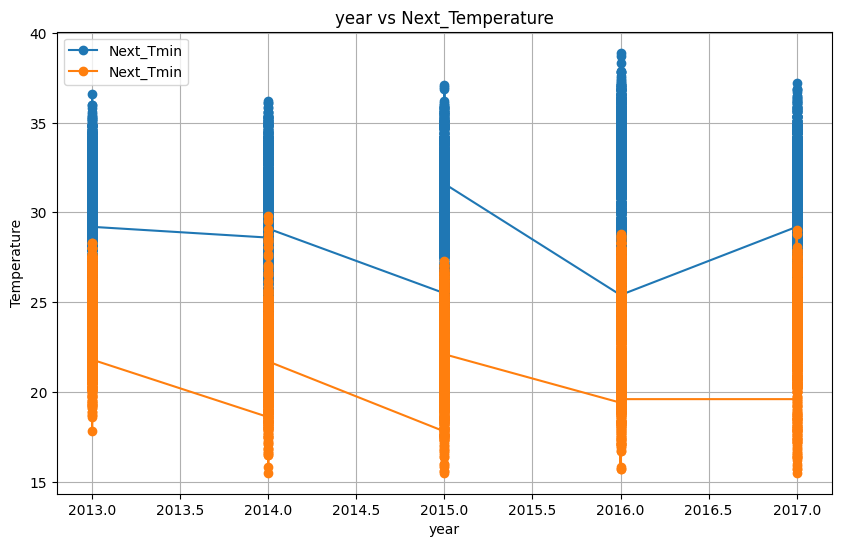

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['Next_Tmax'], marker='o', linestyle='-', label='Next_Tmin')
plt.plot(df['year'], df['Next_Tmin'], marker='o', linestyle='-', label='Next_Tmin')
plt.title('year vs Next_Temperature')
plt.xlabel('year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
df.drop('station', axis=1, inplace=True)

In [49]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year', 'month', 'day'],
      dtype='object')

## Spliting data into training and target set

### Next_Tmin

In [50]:
# Next_Tmin
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y = df['Next_Tmin']

### Next_Tmax

In [51]:
# Next_Tmax
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
Y= df['Next_Tmax'] 

In [52]:
print(Y.value_counts())
print(y.value_counts())

Next_Tmax
30.5    116
33.0    102
31.3     99
29.3     98
29.6     94
       ... 
38.3      1
21.1      1
21.5      1
22.0      1
37.3      1
Name: count, Length: 164, dtype: int64
Next_Tmin
23.5    150
24.0    147
23.4    142
23.1    138
23.2    137
       ... 
28.2      1
29.5      1
29.0      1
16.3      1
16.2      1
Name: count, Length: 137, dtype: int64


### Feature Scaling

In [53]:
# Feature Scaling for Next_Tmin
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Feature Scaling for Next_Tmax
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=x.columns)
print('Next_Tmin', x)
print('Next_Tmax', X)

Next_Tmin       Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.428025     -0.806295     0.194182     0.434384         -0.656315   
1         0.689112     -0.720958    -0.238965     0.360393         -0.008266   
2         0.584380      0.004406    -0.497230    -0.598569          0.079500   
3         0.724022      0.047075     0.193033     1.210579         -0.061544   
4         0.514559     -0.592953     0.043716     0.295375         -0.277013   
...            ...           ...          ...          ...               ...   
6909     -2.383015     -2.342361    -2.232155    -1.424639         -0.751668   
6910     -2.592478     -2.513035    -1.841397    -0.639577         -1.155759   
6911     -2.313194     -2.641040    -2.083805    -1.336644         -1.284459   
6912     -2.313194     -2.385029    -2.279021    -1.564396         -1.044398   
6913     -2.348104     -2.513035    -2.359084    -1.571805         -0.705408   

      LDAPS_Tmin_lapse  LDAPS

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_min = pd.DataFrame({
    'Features': x.columns,
    'VIF values': [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
})

vif_max = pd.DataFrame({
    'Features': X.columns,
    'VIF values': [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
})

display(vif_min)
display(vif_max)

Features  VIF values
0       Present_Tmax    2.746452
1       Present_Tmin    3.170807
2        LDAPS_RHmin    6.053694
3        LDAPS_RHmax    2.269356
4   LDAPS_Tmax_lapse    7.256059
5   LDAPS_Tmin_lapse    6.971566
6           LDAPS_WS    1.244353
7           LDAPS_LH    1.529143
8          LDAPS_CC1    3.512974
9          LDAPS_CC2    4.715493
10         LDAPS_CC3    5.016331
11         LDAPS_CC4    2.736688
12        LDAPS_PPT1    1.559500
13        LDAPS_PPT2    1.423955
14        LDAPS_PPT3    1.273589
15        LDAPS_PPT4    1.285569
16               lat    1.246807
17               lon    1.171292
18               DEM    3.323542
19             Slope    2.886946
20   Solar radiation   38.549463
21              year    1.141765
22             month   31.998254
23               day    9.999011

Features  VIF values
0       Present_Tmax    2.746452
1       Present_Tmin    3.170807
2        LDAPS_RHmin    6.053694
3        LDAPS_RHmax    2.269356
4   LDAPS_Tmax_lapse    7.256059
5   LDAPS_Tmin_lapse    6.971566
6           LDAPS_WS    1.244353
7           LDAPS_LH    1.529143
8          LDAPS_CC1    3.512974
9          LDAPS_CC2    4.715493
10         LDAPS_CC3    5.016331
11         LDAPS_CC4    2.736688
12        LDAPS_PPT1    1.559500
13        LDAPS_PPT2    1.423955
14        LDAPS_PPT3    1.273589
15        LDAPS_PPT4    1.285569
16               lat    1.246807
17               lon    1.171292
18               DEM    3.323542
19             Slope    2.886946
20   Solar radiation   38.549463
21              year    1.141765
22             month   31.998254
23               day    9.999011

We can observe that 2 of the feature column has value greater than 10, so we can crop it.

In [55]:
df.drop(['Solar radiation', 'month'], axis=1, inplace=True)

## 1st model for Next_Tmin

In [56]:
max_r2 = -1  # Initialize with a low value
best_random_state = 0
best_test_size = 0

# Define a list of test sizes to iterate over
test_sizes = [0.20, 0.25, 0.30, 0.35]

for test_size in test_sizes:
    for random_state in range(1, 1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        y_pred = lr.predict(x_test)
        r2 = r2_score(y_test, y_pred)

        if r2 > max_r2:
            max_r2 = r2
            best_random_state = random_state
            best_test_size = test_size

print("Best R-squared score is", max_r2, "on Random State", best_random_state, "with Test Size", best_test_size)

Best R-squared score is 0.8449451496510738 on Random State 937 with Test Size 0.2


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=937)

## LinearRegression

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False], 
    'positive': [True, False],     
    'n_jobs': [-1],                 
}

lr = LinearRegression()

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'fit_intercept': True, 'n_jobs': -1, 'positive': False}


R-squared (R2): 0.8449451496510738
Mean Absolute Error (MAE): 0.7578839650375125
Mean Squared Error (MSE): 0.9140706105365761
Root Mean Squared Error (RMSE): 0.9560704004081374
Mean Squared Logarithmic Error (MSLE): 0.0016598395888999906
Explained Variance Score (EVS): 0.84497898219999
Median Absolute Error: 0.6452648527985794
Max Error: 3.503874235449409


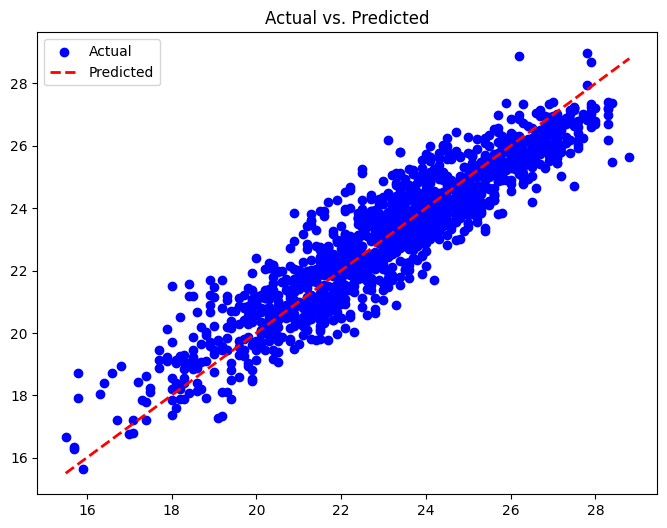

In [59]:
lr = LinearRegression(fit_intercept=True,n_jobs=-1,positive=False)
lr.fit(x_train, y_train)

pred_lr = lr.predict(x_test)

r2 = r2_score(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
mse = mean_squared_error(y_test, pred_lr)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, pred_lr)
evs = explained_variance_score(y_test, pred_lr)
median_err = median_absolute_error(y_test, pred_lr)
max_err = max_error(y_test, pred_lr)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Logarithmic Error (MSLE):', msle)
print('Explained Variance Score (EVS):', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_lr, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## RandomForestRegressor

R-squared (R2): 0.9139121988813567
Mean Absolute Error (MAE): 0.5450542299349244
Mean Squared Error (MSE): 0.5074999508315259
Root Mean Squared Error (RMSE): 0.712390307929246
Mean Squared Logarithmic Error (MSLE): 0.000938811825542598
Explained Variance Score (EVS): 0.9139732075573885
Median Absolute Error: 0.4380000000000166
Max Error: 3.476999999999979


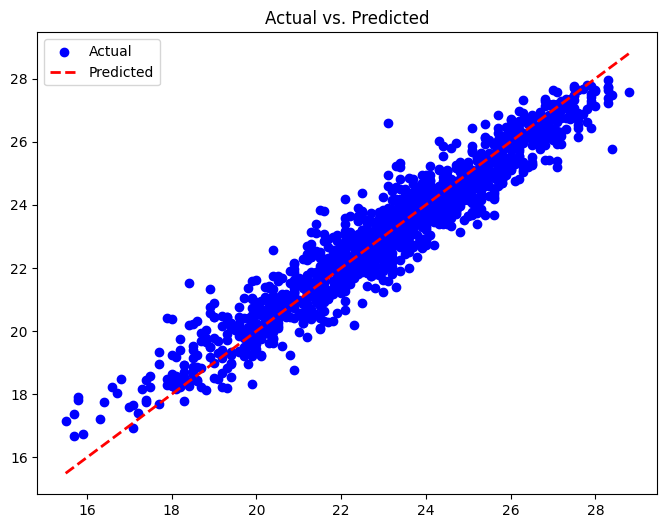

In [60]:
RFR = RandomForestRegressor(criterion='poisson', warm_start=True)
RFR.fit(x_train, y_train)

pred_RFR = RFR.predict(x_test)

r2 = r2_score(y_test, pred_RFR)
mae = mean_absolute_error(y_test, pred_RFR)
mse = mean_squared_error(y_test, pred_RFR)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, pred_RFR)
evs = explained_variance_score(y_test, pred_RFR)
median_err = median_absolute_error(y_test, pred_RFR)
max_err = max_error(y_test, pred_RFR)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Logarithmic Error (MSLE):', msle)
print('Explained Variance Score (EVS):', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_RFR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## DecisionTreeRegressor

R-squared: 1.0
Mean Absolute Error: 0.8089660159074477
Mean Squared Error: 1.1774403470715835
Root Mean Squared Error: 1.085099233743893
Mean Squared Logarithmic Error: 0.0021344372932614766
Explained Variance Score: 0.8005823585244778
Median Absolute Error: 0.6000000000000014
Max Error: 4.699999999999999


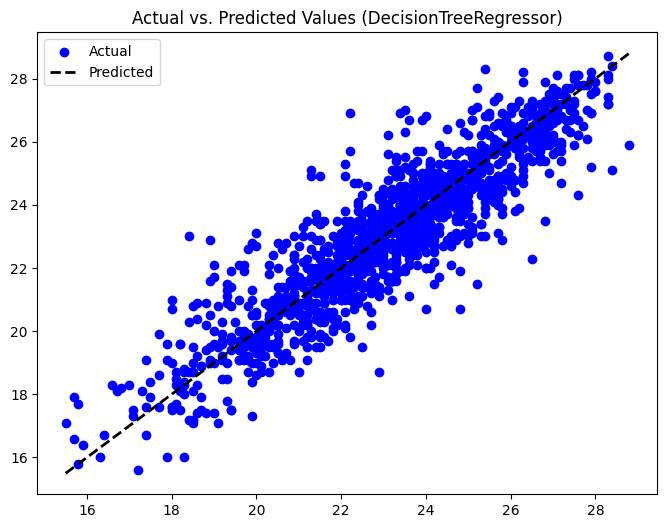

In [61]:
dtr = DecisionTreeRegressor()

# Fit the model
dtr.fit(x_train, y_train)

# Make predictions
pred_dtr = dtr.predict(x_test)

# Calculate various regression metrics
r2 = dtr.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_dtr)
mse = mean_squared_error(y_test, pred_dtr)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, pred_dtr)
evs = explained_variance_score(y_test, pred_dtr)
median_err = median_absolute_error(y_test, pred_dtr)
max_err = max_error(y_test, pred_dtr)

# Print the metrics
print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_dtr, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values (DecisionTreeRegressor)')
plt.legend()
plt.show()

## KNeighborsRegressor

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


R-squared: 1.0
Mean Absolute Error: 0.5596503770433932
Mean Squared Error: 0.5455673717173117
Root Mean Squared Error: 0.7386253256674264
Mean Absolute Percentage Error: 0.024997379902863468
Mean Squared Logarithmic Error: 0.0010460204747294497
Explained Variance Score: 0.907602735828262
Median Absolute Error: 0.43130137655966294
Max Error: 3.773797665792312


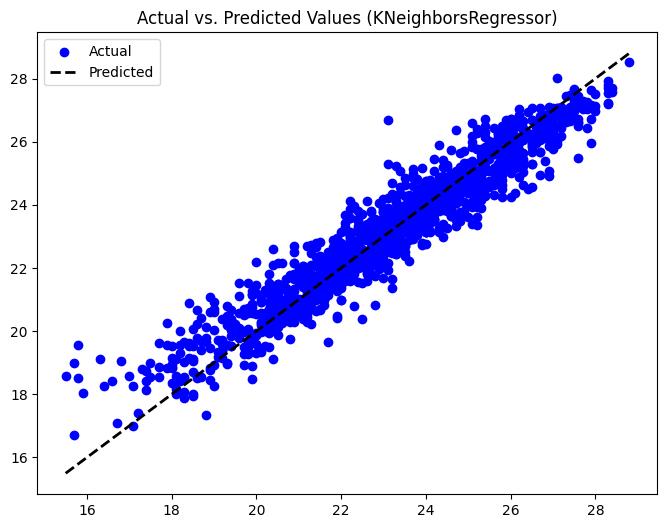

In [63]:
KNN = KNeighborsRegressor(n_neighbors=9,p=1,weights="distance")
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

r2 = KNN.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_KNN)
mse = mean_squared_error(y_test, pred_KNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_KNN)
msle = mean_squared_log_error(y_test, pred_KNN)
evs = explained_variance_score(y_test, pred_KNN)
median_err = median_absolute_error(y_test, pred_KNN)
max_err = max_error(y_test, pred_KNN)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_KNN, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values (KNeighborsRegressor)')
plt.legend()
plt.show()

## Ridge

In [64]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'alpha': 1.0, 'fit_intercept': True, 'solver': 'svd'}


R-squared: 0.8158984159322618
Mean Absolute Error: 0.7579458202761793
Mean Squared Error: 0.9141369823132249
Root Mean Squared Error: 0.9561051104942515
Mean Absolute Percentage Error: 0.03348272621805104
Explained Variance Score: 0.8449674849436188
Median Absolute Error: 0.645768551112738
Max Error: 3.5026466884326197


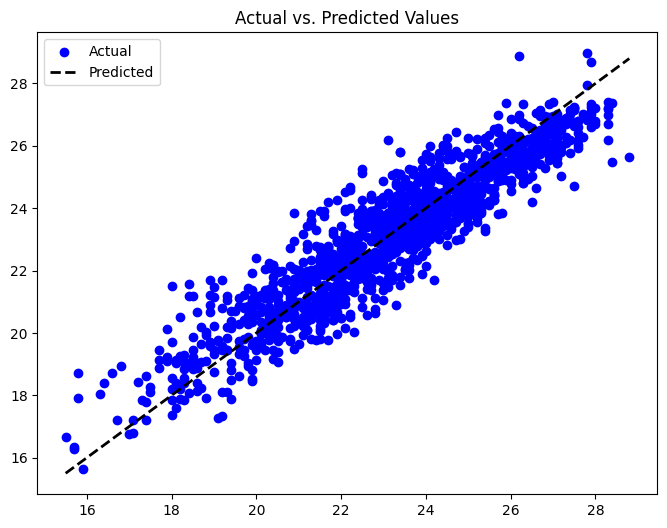

In [65]:
RR = Ridge(alpha=1.0,fit_intercept=True,solver='sag')
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)


r2 = RR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_RR)
mse = mean_squared_error(y_test, pred_RR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_RR)
evs = explained_variance_score(y_test, pred_RR)
median_err = median_absolute_error(y_test, pred_RR)
max_err = max_error(y_test, pred_RR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_RR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Lasso

In [66]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000],
}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000}


R2_score 0.843709301495573
Mean absolute error: 0.761820058837974
Mean squared error: 0.9213561128958188
Root mean squared error: 0.9598729670616934
R-squared: 0.8139133017794404
Mean Absolute Error: 0.761820058837974
Mean Squared Error: 0.9213561128958188
Root Mean Squared Error: 0.9598729670616934
Mean Absolute Percentage Error: 0.03364409170903944
Explained Variance Score: 0.8437330538572367
Median Absolute Error: 0.6332064001137248
Max Error: 3.412422330144988


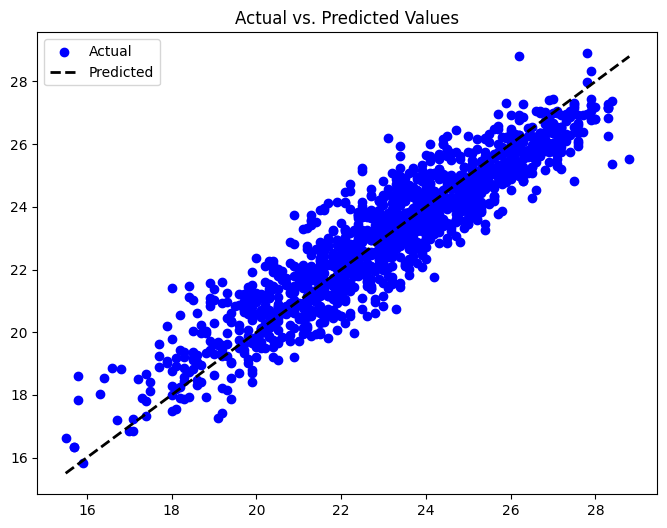

In [67]:
L = Lasso(alpha= 0.01, fit_intercept= True, max_iter= 1000)
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L))
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

r2 = L.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_L)
mse = mean_squared_error(y_test, pred_L)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_L)
evs = explained_variance_score(y_test, pred_L)
median_err = median_absolute_error(y_test, pred_L)
max_err = max_error(y_test, pred_L)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_L, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## AdaBoostRegressor

R-squared: 0.793625631702191
Mean Absolute Error: 0.867622170889793
Mean Squared Error: 1.1245815683970435
Root Mean Squared Error: 1.060462902885831
Mean Absolute Percentage Error: 0.03773656304251078
Mean Squared Logarithmic Error: 0.002008723921138699
Explained Variance Score: 0.8254847237221632
Median Absolute Error: 0.7622729935557437
Max Error: 2.817007797270744


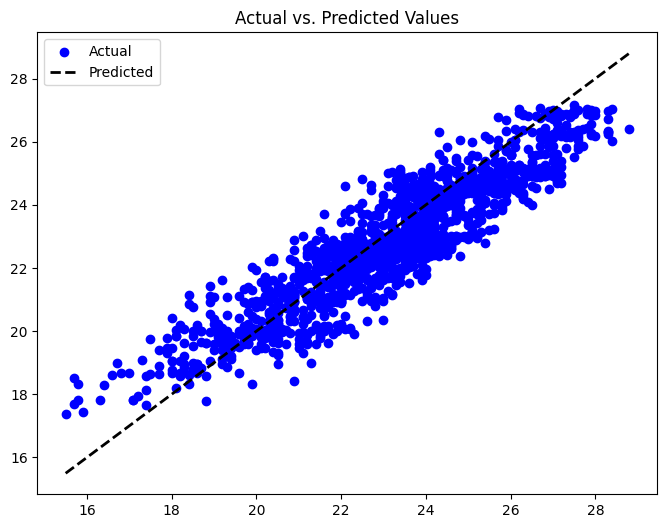

In [68]:
abr = AdaBoostRegressor(learning_rate=1.05, n_estimators=300)
abr.fit(x_train,y_train)
pred_abr = abr.predict(x_test)

r2 = abr.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_abr)
mse = mean_squared_error(y_test, pred_abr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_abr)
msle = mean_squared_log_error(y_test, pred_abr)
evs = explained_variance_score(y_test, pred_abr)
median_err = median_absolute_error(y_test, pred_abr)
max_err = max_error(y_test, pred_abr)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_abr, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## ElasticNet

In [69]:
enet = ElasticNet()

param_grid = {
    'alpha': [0.1, 0.5, 1.0],     
    'l1_ratio': [0.2, 0.5, 0.8],  
}

grid_search = GridSearchCV(enet, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_enet = grid_search.best_estimator_

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.2}


R-squared: 0.807832946591979
Mean Absolute Error: 0.7770224435713093
Mean Squared Error: 0.9595245566938156
Root Mean Squared Error: 0.9795532434195783
Mean Squared Logarithmic Error: 0.001749417216936643
Explained Variance Score: 0.8372749878201984
Median Absolute Error: 0.6409972968531576
Max Error: 3.4729617059206923


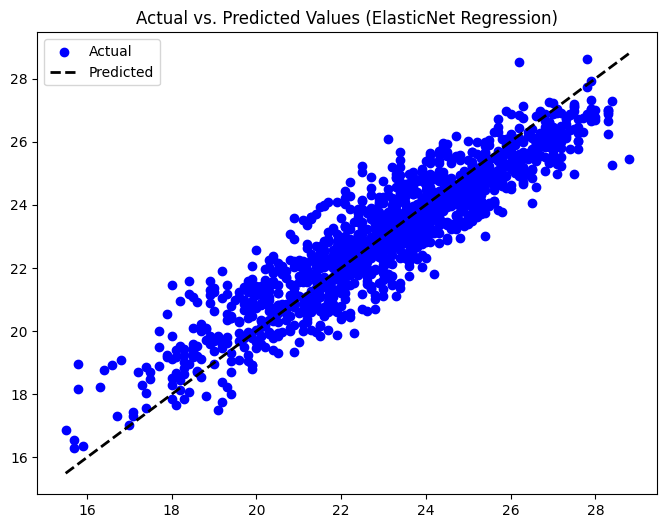

In [70]:
enet = ElasticNet(alpha=0.1, l1_ratio= 0.2)
enet.fit(x_train, y_train)
pred_enet = enet.predict(x_test)

r2 = enet.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_enet)
mse = mean_squared_error(y_test, pred_enet)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, pred_enet)
evs = explained_variance_score(y_test, pred_enet)
median_err = median_absolute_error(y_test, pred_enet)
max_err = max_error(y_test, pred_enet)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_enet, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values (ElasticNet Regression)')
plt.legend()
plt.show()

### KNeighborsRegressor works better in Next Tmax but it may overfitt so we consider RandomForestRegressor

In [71]:
# Save the model as a objectfile
import joblib

joblib.dump(RFR,'Temperature_Forecast_Tmin')

['Temperature_Forecast_Tmin']

In [72]:
df_actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': pred_RFR})

display(df_actual_vs_predicted)

Actual  Predicted
393     24.4     24.375
332     23.3     23.685
4365    22.4     22.404
4044    23.9     24.955
3656    24.6     24.538
...      ...        ...
702     24.5     23.911
1277    24.3     23.917
5877    26.7     26.783
2467    22.8     23.017
1407    23.6     23.422

[1383 rows x 2 columns]

##### Model is giving almost correct prediction

## 2nd model for Next_Tmax

In [73]:
max_r2 = -1 
best_random_state = 0
best_test_size = 0

test_sizes = [0.20, 0.25, 0.30, 0.35]

for test_size in test_sizes:
    for random_state in range(1, 1000):
        x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=test_size, random_state=random_state)
        lr = LinearRegression()
        lr.fit(x_train, Y_train)
        Y_pred = lr.predict(x_test)
        r2 = r2_score(Y_test, Y_pred)

        if r2 > max_r2:
            max_r2 = r2
            best_random_state = random_state
            best_test_size = test_size

print("Best R-squared score is", max_r2, "on Random State", best_random_state, "with Test Size", best_test_size)

Best R-squared score is 0.7872900183875229 on Random State 222 with Test Size 0.2


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=222)

## LinearRegression

In [76]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [-1],
}

lr = LinearRegression()

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(best_params)

{'fit_intercept': True, 'n_jobs': -1, 'positive': False}


R-squared (R2): 0.7872900183875229
Mean Absolute Error (MAE): 1.0560027588415208
Mean Squared Error (MSE): 1.9536989541497285
Root Mean Squared Error (RMSE): 1.3977478149329114
Mean Squared Logarithmic Error (MSLE): 0.002108432127444385
Explained Variance Score (EVS): 0.7883471877198046
Median Absolute Error: 0.8419651556943037
Max Error: 5.752544701312733


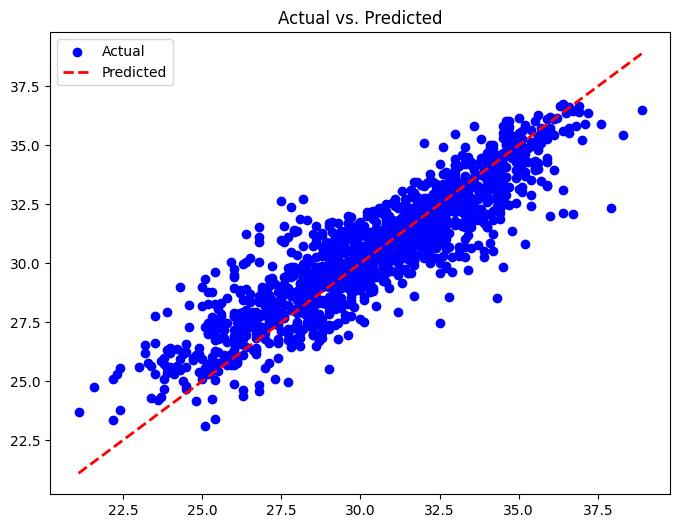

In [77]:
lr = LinearRegression(fit_intercept=True, n_jobs=-1, positive=False)
lr.fit(X_train, Y_train)

pred_lr = lr.predict(X_test)

r2 = r2_score(Y_test, pred_lr)
mae = mean_absolute_error(Y_test, pred_lr)
mse = mean_squared_error(Y_test, pred_lr)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(Y_test, pred_lr)
evs = explained_variance_score(Y_test, pred_lr)
median_err = median_absolute_error(Y_test, pred_lr)
max_err = max_error(Y_test, pred_lr)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Logarithmic Error (MSLE):', msle)
print('Explained Variance Score (EVS):', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_lr, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--r', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## RandomForestRegressor

R-squared (R2): 0.9114680941736973
Mean Absolute Error (MAE): 0.6713116413593638
Mean Squared Error (MSE): 0.8131479797541574
Root Mean Squared Error (RMSE): 0.9017471817278707
Mean Squared Logarithmic Error (MSLE): 0.0008703332130859596
Explained Variance Score (EVS): 0.9118460223105892
Median Absolute Error: 0.5219999999999807
Max Error: 5.234999999999989


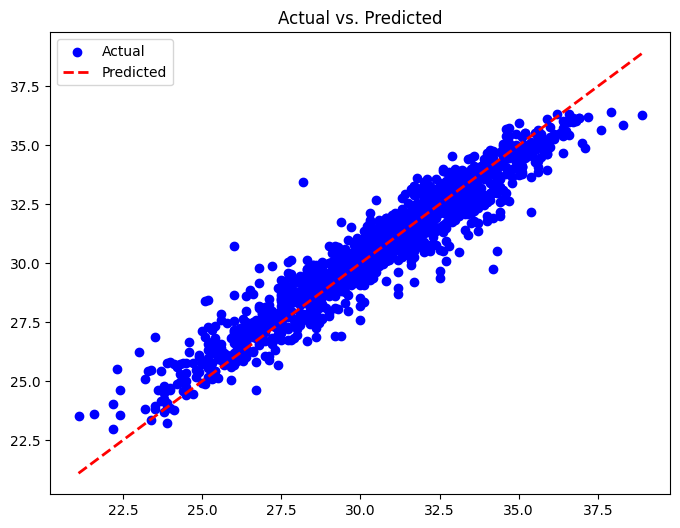

In [78]:
RFR = RandomForestRegressor(criterion='poisson', warm_start=True)
RFR.fit(X_train, Y_train)

pred_RFR = RFR.predict(X_test)

r2 = r2_score(Y_test, pred_RFR)
mae = mean_absolute_error(Y_test, pred_RFR)
mse = mean_squared_error(Y_test, pred_RFR)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(Y_test, pred_RFR)
evs = explained_variance_score(Y_test, pred_RFR)
median_err = median_absolute_error(Y_test, pred_RFR)
max_err = max_error(Y_test, pred_RFR)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Logarithmic Error (MSLE):', msle)
print('Explained Variance Score (EVS):', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_RFR, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--r', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## KNeighborsRegressor

In [79]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


R-squared: 1.0
Mean Absolute Error: 0.6413916795191543
Mean Squared Error: 0.7416304981295668
Root Mean Squared Error: 0.8611797130271747
Mean Absolute Percentage Error: 0.021605351208042776
Mean Squared Logarithmic Error: 0.000810497564500932
Explained Variance Score: 0.9206567856855696
Median Absolute Error: 0.4816122039480426
Max Error: 3.865802127257872


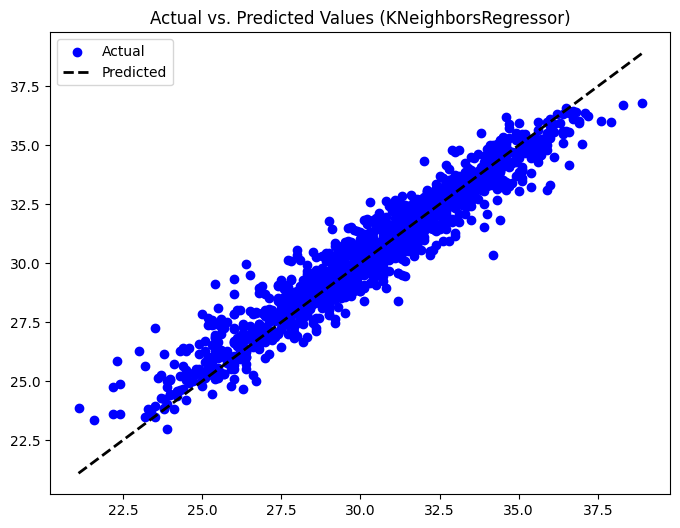

In [80]:
KNN = KNeighborsRegressor(n_neighbors=7, p=1, weights="distance")
KNN.fit(X_train, Y_train)
pred_KNN = KNN.predict(X_test)

r2 = KNN.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_KNN)
mse = mean_squared_error(Y_test, pred_KNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, pred_KNN)
msle = mean_squared_log_error(Y_test, pred_KNN)
evs = explained_variance_score(Y_test, pred_KNN)
median_err = median_absolute_error(Y_test, pred_KNN)
max_err = max_error(Y_test, pred_KNN)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_KNN, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values (KNeighborsRegressor)')
plt.legend()
plt.show()

## Ridge

In [81]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(best_params)

{'alpha': 1.0, 'fit_intercept': True, 'solver': 'lsqr'}


R-squared: 0.7413281779204545
Mean Absolute Error: 1.055945627679129
Mean Squared Error: 1.9535993286814877
Root Mean Squared Error: 1.397712176623459
Mean Absolute Percentage Error: 0.03571707582831501
Explained Variance Score: 0.7883602261369093
Median Absolute Error: 0.8411141088099257
Max Error: 5.751731108847373


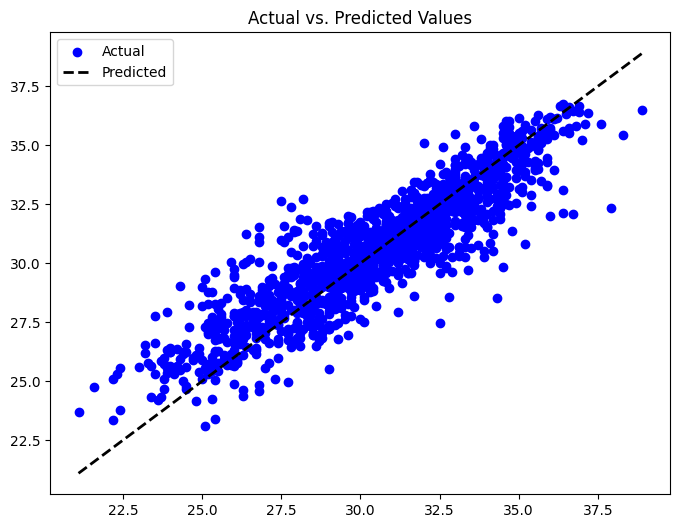

In [82]:
RR = Ridge(alpha=1.0, fit_intercept=True, solver='lsqr')
RR.fit(X_train, Y_train)
pred_RR = RR.predict(X_test)

r2 = RR.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_RR)
mse = mean_squared_error(Y_test, pred_RR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, pred_RR)
evs = explained_variance_score(Y_test, pred_RR)
median_err = median_absolute_error(Y_test, pred_RR)
max_err = max_error(Y_test, pred_RR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_RR, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## ElasticNet

In [83]:
enet = ElasticNet()

param_grid = {
    'alpha': [0.1, 0.5, 1.0],      
    'l1_ratio': [0.2, 0.5, 0.8], 
}

grid_search = GridSearchCV(enet, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_enet = grid_search.best_estimator_

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.2}


R-squared: 0.7338794600021743
Mean Absolute Error: 1.0772723630469523
Mean Squared Error: 2.0282538631206477
Root Mean Squared Error: 1.4241677791330092
Mean Squared Logarithmic Error: 0.002201013544900338
Explained Variance Score: 0.7803168251543477
Median Absolute Error: 0.8498119182177568
Max Error: 6.0198756187787765


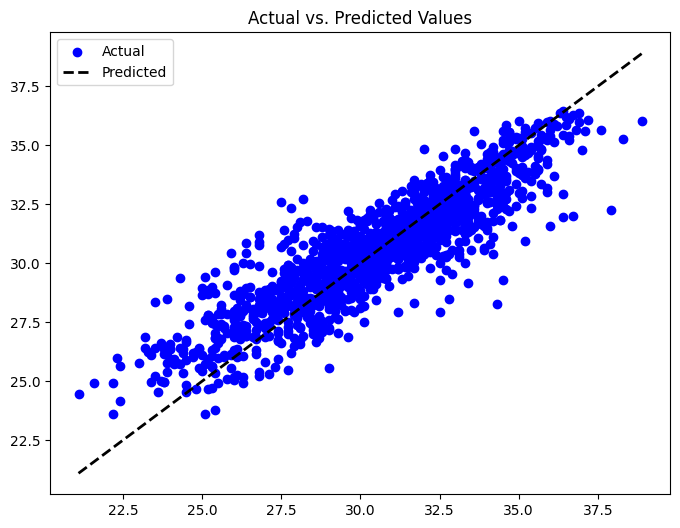

In [84]:
enet = ElasticNet(alpha= 0.1, l1_ratio= 0.2)
enet.fit(X_train, Y_train)
pred_enet = enet.predict(X_test)

r2 = enet.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_enet)
mse = mean_squared_error(Y_test, pred_enet)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(Y_test, pred_enet)
evs = explained_variance_score(Y_test, pred_enet)
median_err = median_absolute_error(Y_test, pred_enet)
max_err = max_error(Y_test, pred_enet)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_enet, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## RandomForestRegressor is fine

In [85]:
# Save the model as a objectfile
import joblib

joblib.dump(RFR,'Temperature_Forecast_Tmin')

['Temperature_Forecast_Tmin']

In [86]:
df_actual_vs_predicted = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_RFR})

display(df_actual_vs_predicted)

Actual  Predicted
7275    25.2     27.307
5524    36.8     36.021
4606    30.0     30.214
5543    35.7     35.485
7321    27.0     27.276
...      ...        ...
2600    27.5     28.607
4022    35.6     33.849
239     25.6     26.566
5761    32.1     32.023
862     31.8     33.619

[1383 rows x 2 columns]

# End